### Will a Customer Accept the Coupon?

**Context**

Imagine driving through town and a coupon is delivered to your cell phone for a restaraunt near where you are driving. Would you accept that coupon and take a short detour to the restaraunt? Would you accept the coupon but use it on a sunbsequent trip? Would you ignore the coupon entirely? What if the coupon was for a bar instead of a restaraunt? What about a coffee house? Would you accept a bar coupon with a minor passenger in the car? What about if it was just you and your partner in the car? Would weather impact the rate of acceptance? What about the time of day?

Obviously, proximity to the business is a factor on whether the coupon is delivered to the driver or not, but what are the factors that determine whether a driver accepts the coupon once it is delivered to them? How would you determine whether a driver is likely to accept a coupon?

**Overview**

The goal of this project is to use what you know about visualizations and probability distributions to distinguish between customers who accepted a driving coupon versus those that did not.

**Data**

This data comes to us from the UCI Machine Learning repository and was collected via a survey on Amazon Mechanical Turk. The survey describes different driving scenarios including the destination, current time, weather, passenger, etc., and then ask the person whether he will accept the coupon if he is the driver. Answers that the user will drive there ‘right away’ or ‘later before the coupon expires’ are labeled as ‘Y = 1’ and answers ‘no, I do not want the coupon’ are labeled as ‘Y = 0’.  There are five different types of coupons -- less expensive restaurants (under \\$20), coffee houses, carry out & take away, bar, and more expensive restaurants (\\$20 - \\$50). 

**Deliverables**

Your final product should be a brief report that highlights the differences between customers who did and did not accept the coupons.  To explore the data you will utilize your knowledge of plotting, statistical summaries, and visualization using Python. You will publish your findings in a public facing github repository as your first portfolio piece. 





### Data Description
Keep in mind that these values mentioned below are average values.

The attributes of this data set include:
1. User attributes
    -  Gender: male, female
    -  Age: below 21, 21 to 25, 26 to 30, etc.
    -  Marital Status: single, married partner, unmarried partner, or widowed
    -  Number of children: 0, 1, or more than 1
    -  Education: high school, bachelors degree, associates degree, or graduate degree
    -  Occupation: architecture & engineering, business & financial, etc.
    -  Annual income: less than \\$12500, \\$12500 - \\$24999, \\$25000 - \\$37499, etc.
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she buys takeaway food: 0, less than 1, 1 to 3, 4 to 8 or greater
    than 8
    -  Number of times that he/she goes to a coffee house: 0, less than 1, 1 to 3, 4 to 8 or
    greater than 8
    -  Number of times that he/she eats at a restaurant with average expense less than \\$20 per
    person: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    

2. Contextual attributes
    - Driving destination: home, work, or no urgent destination
    - Location of user, coupon and destination: we provide a map to show the geographical
    location of the user, destination, and the venue, and we mark the distance between each
    two places with time of driving. The user can see whether the venue is in the same
    direction as the destination.
    - Weather: sunny, rainy, or snowy
    - Temperature: 30F, 55F, or 80F
    - Time: 10AM, 2PM, or 6PM
    - Passenger: alone, partner, kid(s), or friend(s)


3. Coupon attributes
    - time before it expires: 2 hours or one day

In [297]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import plotly.express as px

### Problems

Use the prompts below to get started with your data analysis.  

1. Read in the `coupons.csv` file.




In [299]:
data = pd.read_csv('../data/coupons.csv')

In [300]:
# Display first 5 rows
data.head()

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,1
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,0
2,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,1
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0


2. Investigate the dataset for missing or problematic data.

In [302]:
# check missing values 
data.isnull().sum()

destination                 0
passanger                   0
weather                     0
temperature                 0
time                        0
coupon                      0
expiration                  0
gender                      0
age                         0
maritalStatus               0
has_children                0
education                   0
occupation                  0
income                      0
car                     12576
Bar                       107
CoffeeHouse               217
CarryAway                 151
RestaurantLessThan20      130
Restaurant20To50          189
toCoupon_GEQ5min            0
toCoupon_GEQ15min           0
toCoupon_GEQ25min           0
direction_same              0
direction_opp               0
Y                           0
dtype: int64

In [303]:
# Following Columns have missing values
# car, Bar, CoffeeHouse, CarryAway, RestaurantLessThan20, Restaurant20To50

3. Decide what to do about your missing data -- drop, replace, other...

In [305]:
# Check unique values and frequency of car data
data["car"].value_counts()

car
Scooter and motorcycle                      22
Mazda5                                      22
do not drive                                22
crossover                                   21
Car that is too old to install Onstar :D    21
Name: count, dtype: int64

In [306]:
# Drop car column
# first there is very mimimal data available only about 1%,
# second categories also do not make much sense or useful for our analysis
data = data.drop(columns='car')

In [307]:
#Replacing the missing values with mode of all the other columns - Bar, CoffeeHouse, CarryAway, RestaurantLessThan20, Restaurant20To50
#There are only a few values missing and since these are all categorical variables, mode seems appropriate for replacing the missing values
data['Bar'] = data['Bar'].fillna(data['Bar'].mode()[0])
data['CoffeeHouse'] = data['CoffeeHouse'].fillna(data['CoffeeHouse'].mode()[0])
data['CarryAway'] = data['CarryAway'].fillna(data['CarryAway'].mode()[0])
data['RestaurantLessThan20'] = data['RestaurantLessThan20'].fillna(data['RestaurantLessThan20'].mode()[0])
data['Restaurant20To50'] = data['Restaurant20To50'].fillna(data['Restaurant20To50'].mode()[0])

In [308]:
#Check missing values after replacing them with mode of the column
data.isnull().sum()

destination             0
passanger               0
weather                 0
temperature             0
time                    0
coupon                  0
expiration              0
gender                  0
age                     0
maritalStatus           0
has_children            0
education               0
occupation              0
income                  0
Bar                     0
CoffeeHouse             0
CarryAway               0
RestaurantLessThan20    0
Restaurant20To50        0
toCoupon_GEQ5min        0
toCoupon_GEQ15min       0
toCoupon_GEQ25min       0
direction_same          0
direction_opp           0
Y                       0
dtype: int64

In [309]:
# Data has no null values after handling the missing data. 

##### Handle other problematic data - age and income.

In [311]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12684 entries, 0 to 12683
Data columns (total 25 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   destination           12684 non-null  object
 1   passanger             12684 non-null  object
 2   weather               12684 non-null  object
 3   temperature           12684 non-null  int64 
 4   time                  12684 non-null  object
 5   coupon                12684 non-null  object
 6   expiration            12684 non-null  object
 7   gender                12684 non-null  object
 8   age                   12684 non-null  object
 9   maritalStatus         12684 non-null  object
 10  has_children          12684 non-null  int64 
 11  education             12684 non-null  object
 12  occupation            12684 non-null  object
 13  income                12684 non-null  object
 14  Bar                   12684 non-null  object
 15  CoffeeHouse           12684 non-null

In [312]:
# age is type object, which could create problems, best to convert it to int64
# check unique values and counts for column age
data["age"].value_counts()

age
21         2653
26         2559
31         2039
50plus     1788
36         1319
41         1093
46          686
below21     547
Name: count, dtype: int64

In [313]:
# Replace '50plus' with a suitable numeric representation (e.g., 55)
data['age'] = np.where(data['age'] == '50plus', 55, data['age'])

# Convert 'below21' to 18 which is a common legal age and then convert all other ages to integers
data['age'] = np.where(data['age'] == 'below21', 18, data['age']).astype(int)

# check age column again for unique values & counts
print(data["age"].dtype)
data["age"].value_counts()


int64


age
21    2653
26    2559
31    2039
55    1788
36    1319
41    1093
46     686
18     547
Name: count, dtype: int64

In [314]:
# Define the mapping dictionary for income column
income_mapping = {
    'Less than $12500': 0,
    '$12500 - $24999': 1,
    '$25000 - $37499': 2,
    '$37500 - $49999': 3,
    '$50000 - $62499': 4,
    '$62500 - $74999': 5,
    '$75000 - $87499': 6,
    '$87500 - $99999': 7,
    '$100000 or More': 8
}

# Map the income categories to numeric values
data['income'] = data['income'].map(income_mapping)

# Display unique values in the 'income' column to verify the mapping
print(data['income'].unique())
print(data['income'].dtype)
data['income'].value_counts()

[3 5 1 6 4 2 8 7 0]
int64


income
2    2013
1    1831
3    1805
8    1736
4    1659
0    1042
7     895
6     857
5     846
Name: count, dtype: int64

4. What proportion of the total observations chose to accept the coupon? 



In [316]:
#The proportion/percentage of the total observations chose to accept the coupon is 56.84
(data[data['Y'] == 1].shape[0] / data['Y'].shape[0]) * 100

56.84326710816777

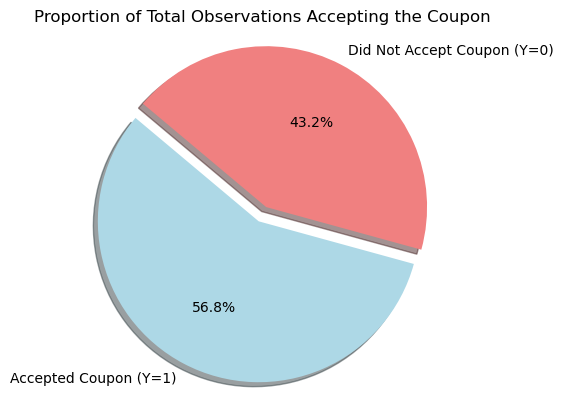

In [317]:
# Calculate how many accepted the coupon and how many didn't
proportion_accepted = data[data['Y'] == 1].shape[0] 
proportion_not_accepted = data[data['Y'] == 0].shape[0] 

# Pie chart for visualization
labels = ['Accepted Coupon (Y=1)', 'Did Not Accept Coupon (Y=0)']
sizes = [proportion_accepted, proportion_not_accepted]
colors = ['lightblue', 'lightcoral']
explode = (0.1, 0)  # explode the 1st slice

plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=140)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('Proportion of Total Observations Accepting the Coupon')
plt.show()

5. Use a bar plot to visualize the `coupon` column.

Text(0.5, 1.0, 'Distribution and Acceptance of the Coupons')

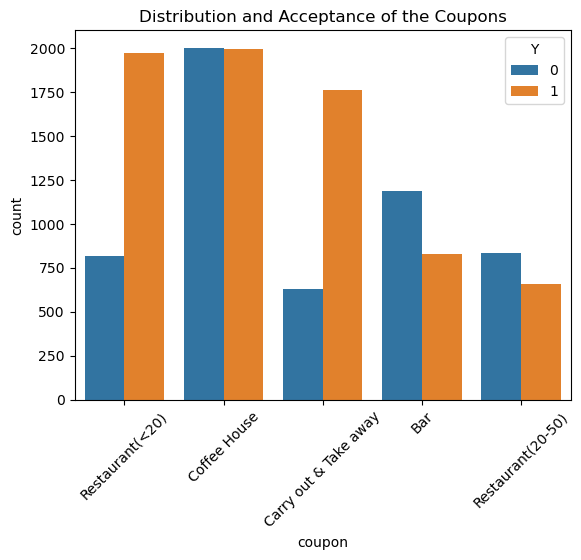

In [319]:
# create a sns countplot for coupon column, color by Y column
sns.countplot(data=data, x="coupon", hue="Y")
plt.xticks(rotation=45)
plt.title('Distribution and Acceptance of the Coupons')

In [320]:
# Acceptance rates seems higher for Restaurants(<20) and Carry out & Take away and almost 50% for CoffeeHouse

6. Use a histogram to visualize the temperature column.

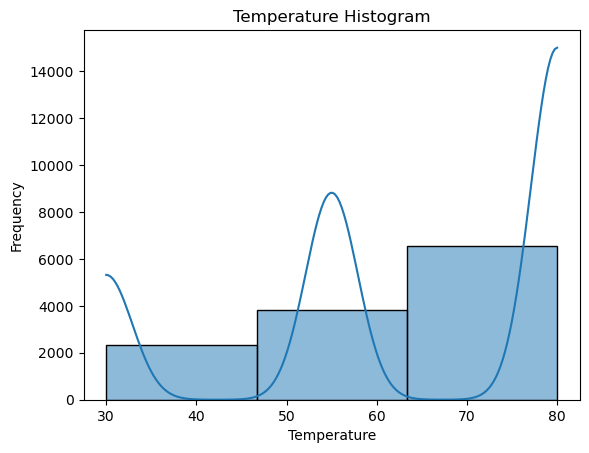

In [322]:
# Create a sns histogram plot
sns.histplot(data['temperature'], bins=3, kde=True)
plt.title('Temperature Histogram')
plt.xlabel('Temperature')
plt.ylabel('Frequency')
plt.show()

In [323]:
# Higher temperatures are more frequently occuring

**Investigating the Bar Coupons**

Now, we will lead you through an exploration of just the bar related coupons.  

1. Create a new `DataFrame` that contains just the bar coupons.


In [325]:
# Create a new DataFrame that contains just the bar coupons
bar_coupon_data = data[data["coupon"]=="Bar"]
bar_coupon_data # display bar coupon data

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
9,No Urgent Place,Kid(s),Sunny,80,10AM,Bar,1d,Female,21,Unmarried partner,...,never,1~3,4~8,1~3,1,1,0,0,1,0
13,Home,Alone,Sunny,55,6PM,Bar,1d,Female,21,Unmarried partner,...,never,1~3,4~8,1~3,1,0,0,1,0,1
17,Work,Alone,Sunny,55,7AM,Bar,1d,Female,21,Unmarried partner,...,never,1~3,4~8,1~3,1,1,1,0,1,0
24,No Urgent Place,Friend(s),Sunny,80,10AM,Bar,1d,Male,21,Single,...,less1,4~8,4~8,less1,1,0,0,0,1,1
35,Home,Alone,Sunny,55,6PM,Bar,1d,Male,21,Single,...,less1,4~8,4~8,less1,1,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12663,No Urgent Place,Friend(s),Sunny,80,10PM,Bar,1d,Male,26,Single,...,never,1~3,4~8,1~3,1,1,0,0,1,0
12664,No Urgent Place,Friend(s),Sunny,55,10PM,Bar,2h,Male,26,Single,...,never,1~3,4~8,1~3,1,1,0,0,1,0
12667,No Urgent Place,Alone,Rainy,55,10AM,Bar,1d,Male,26,Single,...,never,1~3,4~8,1~3,1,1,0,0,1,0
12670,No Urgent Place,Partner,Rainy,55,6PM,Bar,2h,Male,26,Single,...,never,1~3,4~8,1~3,1,1,0,0,1,0


In [326]:
# check data contains only bar coupon data
bar_coupon_data["coupon"].value_counts()

coupon
Bar    2017
Name: count, dtype: int64

2. What proportion of bar coupons were accepted?


In [328]:
# check column Y for how many bar coupons were accepted
bar_coupon_data["Y"].value_counts()

Y
0    1190
1     827
Name: count, dtype: int64

In [329]:
#The proportion/percentage of bar coupons accepted is 41
proportion_accepted_bar = (bar_coupon_data[bar_coupon_data['Y'] == 1].shape[0] / bar_coupon_data['Y'].shape[0]) * 100
proportion_accepted_bar

41.00148735746158

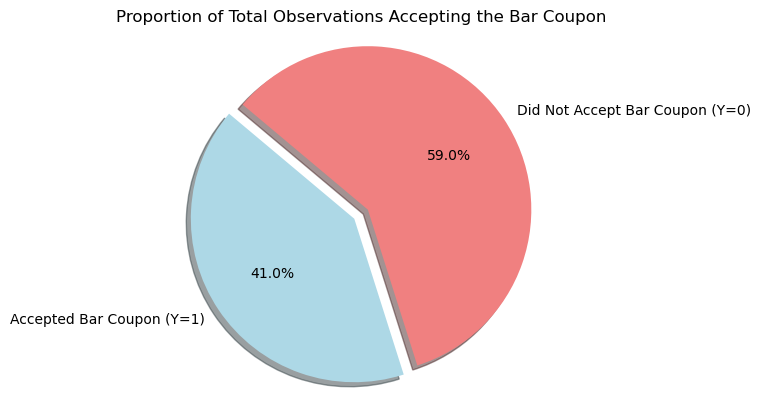

In [330]:
#The proportion/percentage of bar coupons not accepted
proportion_not_accepted_bar = (bar_coupon_data[bar_coupon_data['Y'] == 0].shape[0] / bar_coupon_data['Y'].shape[0]) * 100

# Pie chart for visualization
labels = ['Accepted Bar Coupon (Y=1)', 'Did Not Accept Bar Coupon (Y=0)']
sizes = [proportion_accepted_bar, proportion_not_accepted_bar]
colors = ['lightblue', 'lightcoral']
explode = (0.1, 0)  # explode the 1st slice

plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=140)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('Proportion of Total Observations Accepting the Bar Coupon')
plt.show()

3. Compare the acceptance rate between those who went to a bar 3 or fewer times a month to those who went more.


In [332]:
# Check the data and value counts
bar_coupon_data['Bar'].value_counts()

Bar
never    851
less1    570
1~3      397
4~8      150
gt8       49
Name: count, dtype: int64

Text(0.5, 1.0, 'Distribution and Acceptance of the Bar coupons by the number of visits')

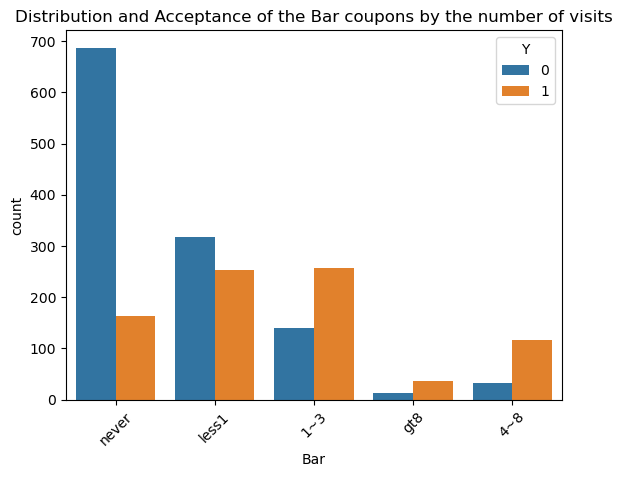

In [333]:
# create a sns countplot for Bar column, color by Y column
sns.countplot(data=bar_coupon_data, x="Bar", hue="Y")
plt.xticks(rotation=45)
plt.title('Distribution and Acceptance of the Bar coupons by the number of visits')

In [334]:
# Acceptance rates seems higher for those who went to bar more than 1 time

In [335]:
# Bar Subset1 for users who went to a bar 3 or fewer times a month
bar_subset1 = bar_coupon_data[bar_coupon_data['Bar'].isin(['never', 'less1', '1~3'])]

# Bar Subset2 for users who went to a bar more than 3 times a month
bar_subset2 = bar_coupon_data[bar_coupon_data['Bar'].isin(['4~8', 'gt8'])]

In [336]:
# Calculate acceptance rates
bar_acceptance_rate_subset1 = (bar_subset1[bar_subset1['Y'] == 1].shape[0] / bar_subset1['Y'].shape[0]) * 100
bar_acceptance_rate_subset2 = (bar_subset2[bar_subset2['Y'] == 1].shape[0] / bar_subset2['Y'].shape[0]) * 100

print("Acceptance Rate for Users with 3 or Fewer Bar Visits:", bar_acceptance_rate_subset1)
print("Acceptance Rate for Users with More Than 3 Bar Visits:", bar_acceptance_rate_subset2)

Acceptance Rate for Users with 3 or Fewer Bar Visits: 37.073707370737075
Acceptance Rate for Users with More Than 3 Bar Visits: 76.88442211055276


[Text(0.5, 1.0, 'more_than_3_visits')]

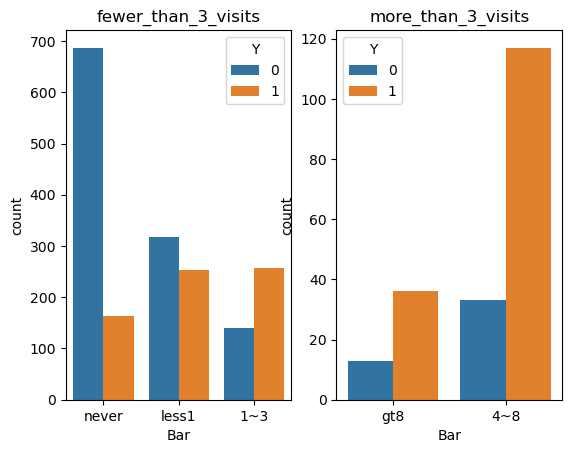

In [337]:
# chart to display and compare acceptance rates for Bar visits 
# using subplots to display both the charts 
fig, ax = plt.subplots(1,2)
sns.countplot(data=bar_subset1, x="Bar", hue="Y", ax=ax[0]).set(title='fewer_than_3_visits')
sns.countplot(data=bar_subset2, x="Bar", hue="Y", ax=ax[1]).set(title='more_than_3_visits')

In [338]:
# Acceptance rates are much higher for those who went to the bar more than 3 times

4. Compare the acceptance rate between drivers who go to a bar more than once a month and are over the age of 25 to the all others.  Is there a difference?


In [340]:
# get the unique values for Bar and age
bar_coupon_data.Bar.unique(), bar_coupon_data.age.unique()

(array(['never', 'less1', '1~3', 'gt8', '4~8'], dtype=object),
 array([21, 46, 26, 31, 41, 55, 36, 18]))

In [341]:
# Subset 3: Drivers who go to a bar more than once a month and are over the age of 25
bar_subset3 = bar_coupon_data.query('(Bar == "1~3" or Bar == "4~8" or Bar == "gt8") and age > 25')
bar_subset3["age"].value_counts(), bar_subset3["Bar"].value_counts()

(age
 26    169
 31     96
 55     67
 36     40
 41     32
 46     16
 Name: count, dtype: int64,
 Bar
 1~3    284
 4~8    106
 gt8     30
 Name: count, dtype: int64)

In [342]:
# Subset 4: All other drivers
bar_subset4 = bar_coupon_data.query('(Bar == "never" or Bar == "less1") and age <= 25')
bar_subset4["age"].value_counts(), bar_subset4["Bar"].value_counts()

(age
 21    251
 18     77
 Name: count, dtype: int64,
 Bar
 never    208
 less1    120
 Name: count, dtype: int64)

In [343]:
# Calculate acceptance rates for each subset
bar_acceptance_rate_subset3 = bar_subset3[bar_subset3["Y"] == 1].shape[0] / bar_subset3["Y"].shape[0] *100
bar_acceptance_rate_subset4 = bar_subset4[bar_subset4["Y"] == 1].shape[0] / bar_subset4["Y"].shape[0] *100

# Print acceptance rates
print("Acceptance rate for drivers who go to a bar more than once a month and are over the age of 25:", bar_acceptance_rate_subset3)
print("Acceptance rate for all other drivers:", bar_acceptance_rate_subset4)

Acceptance rate for drivers who go to a bar more than once a month and are over the age of 25: 69.52380952380952
Acceptance rate for all other drivers: 39.329268292682926


In [344]:
# Check if there is a difference
if bar_acceptance_rate_subset3 > bar_acceptance_rate_subset4:
    print("There is a higher acceptance rate for drivers who go to a bar more than once a month and are over the age of 25.")
elif bar_acceptance_rate_subset3 < bar_acceptance_rate_subset4:
    print("There is a higher acceptance rate for all other drivers.")
else:
    print("The acceptance rates are the same for both groups.")

There is a higher acceptance rate for drivers who go to a bar more than once a month and are over the age of 25.


[Text(0.5, 1.0, 'all_others')]

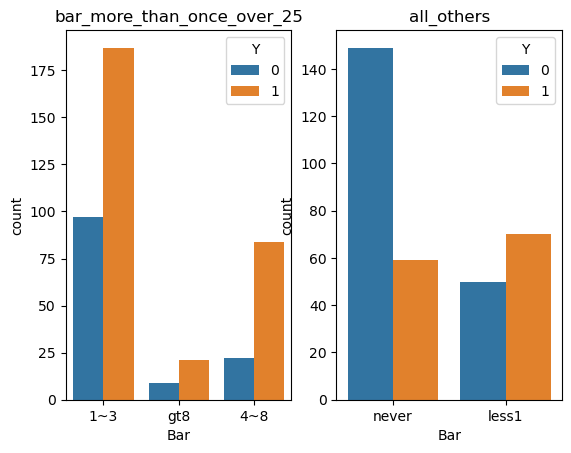

In [345]:
# create sns plots to visualize these scenarios
fig, ax = plt.subplots(1,2)
sns.countplot(data=bar_subset3, x="Bar", hue="Y", ax=ax[0]).set(title='bar_more_than_once_over_25')
sns.countplot(data=bar_subset4, x="Bar", hue="Y", ax=ax[1]).set(title='all_others')

In [346]:
# There is a higher acceptance rate for drivers who go to a bar more than once a month and are over the age of 25.

5. Use the same process to compare the acceptance rate between drivers who go to bars more than once a month and had passengers that were not a kid and had occupations other than farming, fishing, or forestry. 


<Axes: xlabel='occupation', ylabel='Bar'>

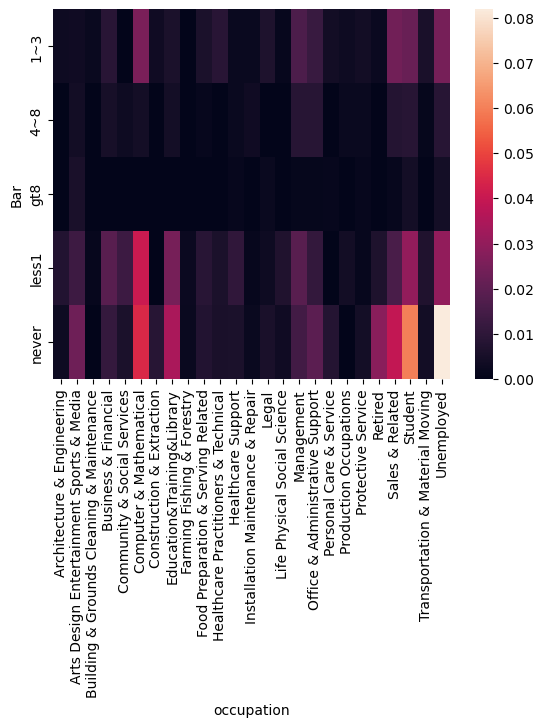

In [348]:
# check relation of occupation with acceptance of Bar coupons using sns heatmap
sns.heatmap(pd.crosstab(bar_coupon_data.Bar, bar_coupon_data.occupation, normalize=True), annot=False)

In [349]:
# Following occupations go to the bar 1~3 times more frequently than others:
# Computer & Mathetical
# Management
# Office Adminstrative Support
# Sales & Related
# Student
# Unemployed

In [350]:
# check the value counts for both passanger and occupation
bar_coupon_data["passanger"].value_counts(), bar_coupon_data["occupation"].value_counts()

(passanger
 Alone        1200
 Friend(s)     337
 Partner       274
 Kid(s)        206
 Name: count, dtype: int64,
 occupation
 Unemployed                                   301
 Student                                      251
 Computer & Mathematical                      232
 Sales & Related                              178
 Education&Training&Library                   140
 Management                                   119
 Office & Administrative Support              105
 Arts Design Entertainment Sports & Media     100
 Business & Financial                          89
 Retired                                       75
 Food Preparation & Serving Related            48
 Community & Social Services                   44
 Healthcare Support                            44
 Healthcare Practitioners & Technical          41
 Transportation & Material Moving              35
 Legal                                         34
 Architecture & Engineering                    27
 Personal Care & Servic

passanger
Alone        356
Friend(s)    120
Partner       75
Name: count, dtype: int64

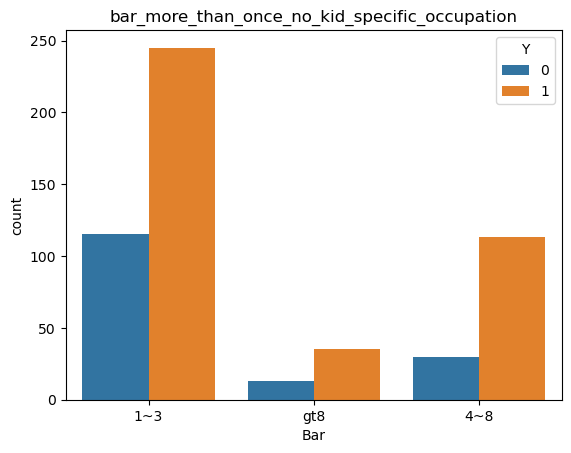

In [351]:
# subset 5: drivers who go to bars more than once a month and had passengers that were not a kid 
# and had occupations other than farming, fishing, or forestry.
bar_subset5 = bar_coupon_data.query('(Bar == "1~3" or Bar == "4~8" or Bar == "gt8") and (passanger != "Kid(s)") and occupation != "Farming Fishing & Forestry"')

#create sns countplot to visualize
sns.countplot(data=bar_subset5, x="Bar", hue="Y").set(title='bar_more_than_once_no_kid_specific_occupation')
bar_subset5['passanger'].value_counts()

In [352]:
# Calculate acceptance rate
bar_acceptance_rate_subset5 = bar_subset5[bar_subset5["Y"] == 1].shape[0] / bar_subset5["Y"].shape[0] *100
bar_acceptance_rate_subset5

71.32486388384754

In [353]:
# Acceptance rates are higher for subset 5: drivers who go to bars more than once a month and had passengers that were not a kid 

6. Compare the acceptance rates between those drivers who:

- go to bars more than once a month, had passengers that were not a kid, and were not widowed *OR*
- go to bars more than once a month and are under the age of 30 *OR*
- go to cheap restaurants more than 4 times a month and income is less than 50K. 



In [355]:
# check unique values and counts for maritalstatus
bar_coupon_data['maritalStatus'].value_counts()

maritalStatus
Married partner      882
Single               661
Unmarried partner    378
Divorced              75
Widowed               21
Name: count, dtype: int64

[Text(0.5, 1.0, 'bar_more_than_once_no_kid_not_widowed')]

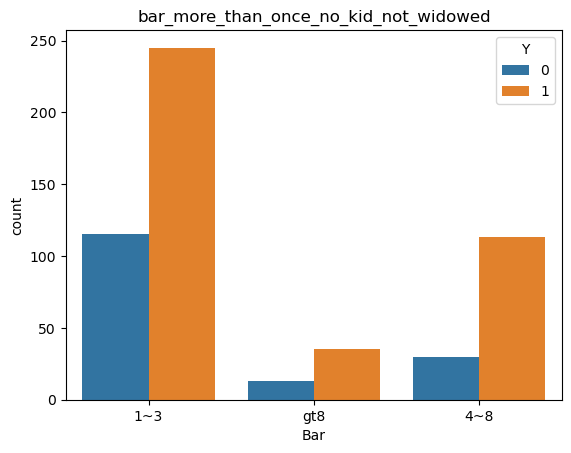

In [356]:
# subset6 - go to bars more than once a month, had passengers that were not a kid, and were not widowed 
bar_subset6 = bar_coupon_data.query('(Bar == "1~3" or Bar == "4~8" or Bar == "gt8") and (passanger != "Kid(s)") and maritalStatus != "Widowed"')

#create sns countplot to visualize
sns.countplot(data=bar_subset6, x="Bar", hue="Y").set(title='bar_more_than_once_no_kid_not_widowed')

In [357]:
# Calculate acceptance rate
bar_acceptance_rate_subset6 = bar_subset6[bar_subset6["Y"] == 1].shape[0] / bar_subset6["Y"].shape[0] *100
bar_acceptance_rate_subset6

71.32486388384754

In [358]:
# Acceptance rates are higher for subset 6 - go to bars more than once a month, had passengers that were not a kid, and were not widowed 

[Text(0.5, 1.0, 'bar_more_than_once_under_30')]

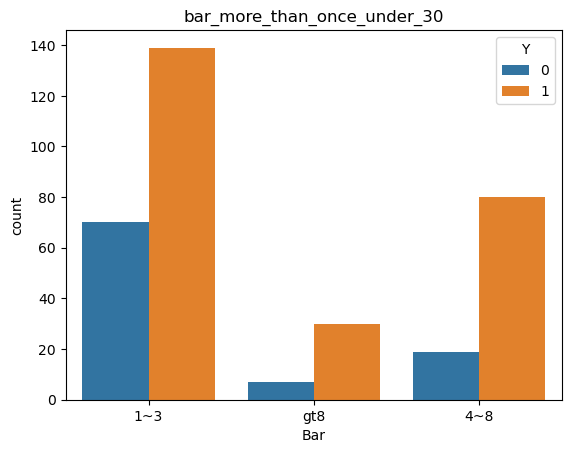

In [359]:
# subset7 - go to bars more than once a month and are under the age of 30
bar_subset7 = bar_coupon_data.query('(Bar == "1~3" or Bar == "4~8" or Bar == "gt8") and age < 30')

#create sns countplot to visualize
sns.countplot(data=bar_subset7, x="Bar", hue="Y").set(title='bar_more_than_once_under_30')

In [360]:
# Calculate acceptance rate
bar_acceptance_rate_subset7 = bar_subset7[bar_subset7["Y"] == 1].shape[0] / bar_subset7["Y"].shape[0] *100
bar_acceptance_rate_subset7

72.17391304347827

In [361]:
# Acceptance rates are much higher for subset 7 - go to bars more than once a month and are under the age of 30

In [362]:
# subset 8 - go to cheap restaurants more than 4 times a month and income is less than 50K.
# check unique values and counts for RestaurantLessThan20 and income columns
bar_coupon_data["RestaurantLessThan20"].value_counts(), bar_coupon_data["income"].value_counts()

(RestaurantLessThan20
 1~3      901
 4~8      568
 less1    325
 gt8      186
 never     37
 Name: count, dtype: int64,
 income
 2    318
 8    291
 1    288
 3    267
 4    262
 0    165
 6    151
 7    145
 5    130
 Name: count, dtype: int64)

In [363]:
# subset 8 - go to cheap restaurants more than 4 times a month and income is less than 50K.
bar_subset8 = bar_coupon_data.query('(RestaurantLessThan20 == "4~8" or RestaurantLessThan20 == "gt8") and income < 4')

[Text(0.5, 1.0, 'RestaurantLessThan20_more_than_4_times_and_income_less_than_50K')]

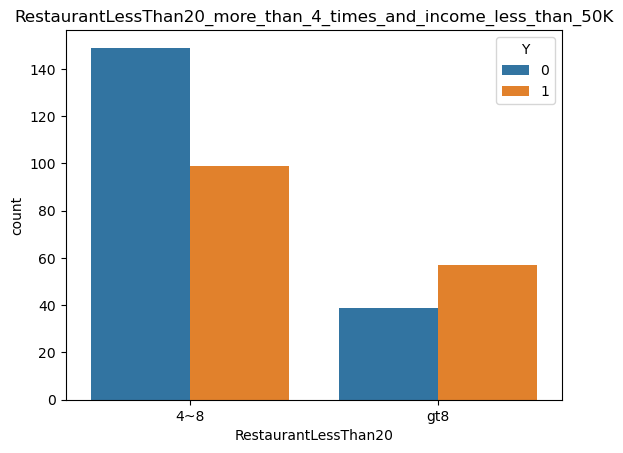

In [364]:
#create sns countplot to visualize
sns.countplot(data=bar_subset8, x="RestaurantLessThan20", hue="Y").set(title='RestaurantLessThan20_more_than_4_times_and_income_less_than_50K')

In [365]:
# Calculate acceptance rate
bar_acceptance_rate_subset8 = bar_subset8[bar_subset8["Y"] == 1].shape[0] / bar_subset8["Y"].shape[0] *100
bar_acceptance_rate_subset8

45.348837209302324

In [366]:
# Acceptance rates are very low for subset 8 - go to cheap restaurants more than 4 times a month and income is less than 50K.

In [367]:
# Create a List of all the Acceptance rates from Subsets 1 to 8 and a label list
bar_acceptance_rates = [bar_acceptance_rate_subset1, bar_acceptance_rate_subset2, bar_acceptance_rate_subset3, bar_acceptance_rate_subset4, bar_acceptance_rate_subset5, bar_acceptance_rate_subset6, bar_acceptance_rate_subset7, bar_acceptance_rate_subset8]
bar_subset_labels = ['Subset 1', 'Subset 2', 'Subset 3', 'Subset 4', 'Subset 5', 'Subset 6', 'Subset 7', 'Subset 8']
bar_acceptance_rates

[37.073707370737075,
 76.88442211055276,
 69.52380952380952,
 39.329268292682926,
 71.32486388384754,
 71.32486388384754,
 72.17391304347827,
 45.348837209302324]

In [368]:
# create a DataFrame for acceptance rates in all the subsets and add labels
bar_acceptance_rates_df = pd.DataFrame({'Bar Subset': bar_subset_labels, 'Bar Acceptance Rates': bar_acceptance_rates})
bar_acceptance_rates_df

,Bar Subset,Bar Acceptance Rates
0,Subset 1,37.073707
1,Subset 2,76.884422
2,Subset 3,69.523810
3,Subset 4,39.329268
4,Subset 5,71.324864
5,Subset 6,71.324864
6,Subset 7,72.173913
7,Subset 8,45.348837


([0, 1, 2, 3, 4, 5, 6, 7],
 [Text(0, 0, 'Subset 2'),
  Text(1, 0, 'Subset 7'),
  Text(2, 0, 'Subset 5'),
  Text(3, 0, 'Subset 6'),
  Text(4, 0, 'Subset 3'),
  Text(5, 0, 'Subset 8'),
  Text(6, 0, 'Subset 4'),
  Text(7, 0, 'Subset 1')])

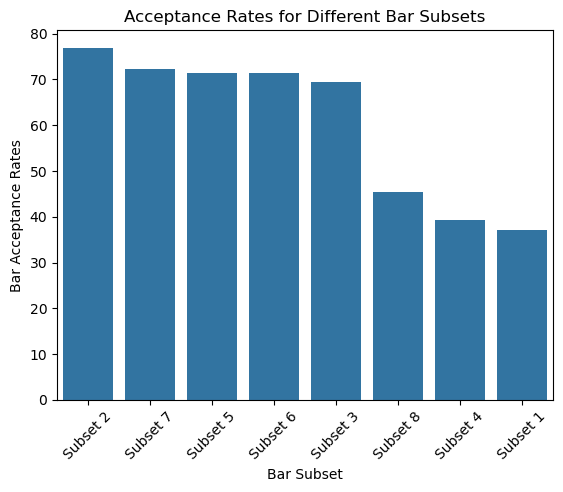

In [369]:
# Create a bar plot
sns.barplot(data=bar_acceptance_rates_df.sort_values('Bar Acceptance Rates', ascending=False), x = "Bar Subset" , y = "Bar Acceptance Rates")
plt.title('Acceptance Rates for Different Bar Subsets')
plt.xticks(rotation=45)

7.  Based on these observations, what do you hypothesize about drivers who accepted the bar coupons?

In [371]:
# Bar Subsets:
# Subset 1 - users who went to a bar 3 or fewer times a month
# Subset 2 - users who went to a bar more than 3 times a month
# Subset 3 - Drivers who go to a bar more than once a month and are over the age of 25
# Subset 4 - All other drivers
# subset 5 - drivers who go to bars more than once a month and had passengers that were not a kid and had occupations other than farming, fishing, or forestry.
# subset 6 - go to bars more than once a month, had passengers that were not a kid, and were not widowed 
# subset 7 - go to bars more than once a month and are under the age of 30
# subset 8 - go to cheap restaurants more than 4 times a month and income is less than 50K

In [372]:
# Conclusion Bar Coupons:
# - Acceptance rates are higher for people between the age 25 to 30
# - who go to the bar more than once a month,its highest for those who go to the bar more than 3 times 
# - who had passengers that were not a kid and 
# - had occupations other than farming, fishing, or forestry and 
# - were not widowed
# - Accpetance rates are lower for those who go to cheap restaurants more than 4 times and income is less than 50K

### Independent Investigation

Using the bar coupon example as motivation, you are to explore one of the other coupon groups and try to determine the characteristics of passengers who accept the coupons.  

In [374]:
# EDA (Exploratory Data Analysis) for CoffeeHouse Coupons

In [375]:
# check unique values in Coupon column
data.coupon.unique()

array(['Restaurant(<20)', 'Coffee House', 'Carry out & Take away', 'Bar',
       'Restaurant(20-50)'], dtype=object)

In [376]:
# create a DataFrame that has only Coffee House Coupon data 
coffee_coupon_data = data.query('coupon == "Coffee House"')
coffee_coupon_data.head() # display first 5 rows 

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,...,never,1~3,4~8,1~3,1,0,0,0,1,0
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,...,never,1~3,4~8,1~3,1,1,0,0,1,0
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,...,never,1~3,4~8,1~3,1,1,0,0,1,0
12,No Urgent Place,Kid(s),Sunny,55,6PM,Coffee House,2h,Female,21,Unmarried partner,...,never,1~3,4~8,1~3,1,1,0,0,1,1
15,Home,Alone,Sunny,80,6PM,Coffee House,2h,Female,21,Unmarried partner,...,never,1~3,4~8,1~3,1,0,0,0,1,0


In [377]:
# Descriptive Statistics for Coffee Coupon data
coffee_coupon_data.describe()

,temperature,age,has_children,income,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
count,3996.000000,3996.000000,3996.000000,3996.000000,3996.0,3996.000000,3996.000000,3996.000000,3996.000000,3996.000000
mean,68.031782,32.646647,0.387888,3.702703,1.0,0.518769,0.077578,0.187688,0.812312,0.499249
std,15.984543,11.525724,0.487330,2.515176,0.0,0.499710,0.267539,0.390511,0.390511,0.500062
min,30.000000,18.000000,0.000000,0.000000,1.0,0.000000,0.000000,0.000000,0.000000,0.000000
25%,55.000000,21.000000,0.000000,2.000000,1.0,0.000000,0.000000,0.000000,1.000000,0.000000
50%,80.000000,31.000000,0.000000,3.000000,1.0,1.000000,0.000000,0.000000,1.000000,0.000000
75%,80.000000,41.000000,1.000000,6.000000,1.0,1.000000,0.000000,0.000000,1.000000,1.000000
max,80.000000,55.000000,1.000000,8.000000,1.0,1.000000,1.000000,1.000000,1.000000,1.000000


In [378]:
# get unique values and counts in CoffeeHouse column 
coffee_coupon_data['CoffeeHouse'].value_counts()

CoffeeHouse
less1    1147
1~3      1042
never     927
4~8       538
gt8       342
Name: count, dtype: int64

Text(0.5, 1.0, 'Distribution and acceptance of the CofeeHouse coupon by number of visits to Coffee House')

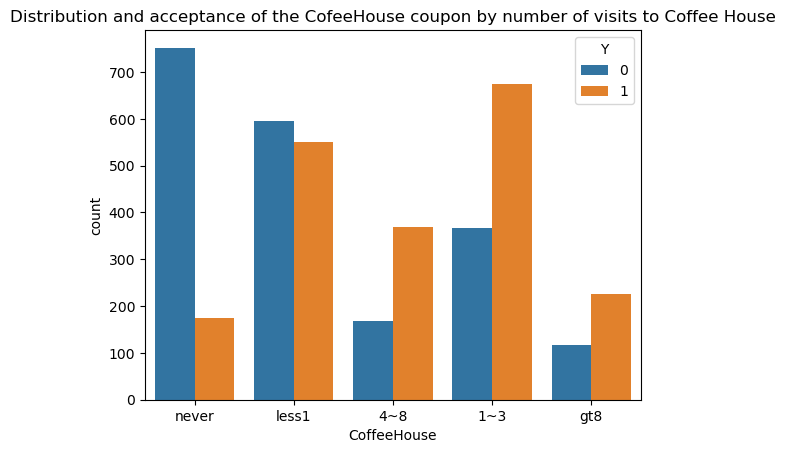

In [379]:
# Distribution and acceptance of the CofeeHouse coupon data
sns.countplot(data=coffee_coupon_data, x="CoffeeHouse", hue="Y")
plt.title('Distribution and acceptance of the CofeeHouse coupon by number of visits to Coffee House')

In [380]:
# Acceptance rates seem to be higher for people visiting Coffee House more than once. 

##### Analyzing Age and Coffee House Variables

<Axes: xlabel='age', ylabel='CoffeeHouse'>

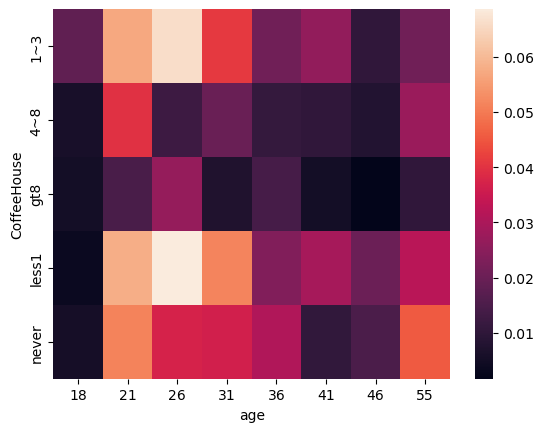

In [382]:
# create sns heatmap to co-relate age and CoffeeHouse visits
sns.heatmap(pd.crosstab(coffee_coupon_data.CoffeeHouse, coffee_coupon_data.age, normalize=True), annot=False)

In [383]:
# Max footprint is in between age 21 and 31

<Axes: xlabel='age', ylabel='count'>

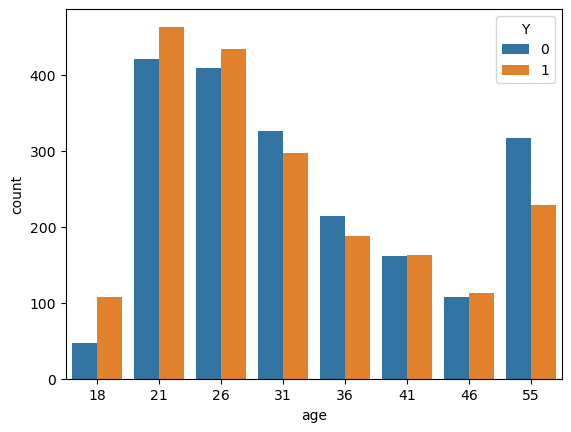

In [384]:
# create sns bar chart for age and acceptance rate
sns.countplot(data=coffee_coupon_data, x='age', hue='Y')

In [385]:
# Acceptance rates are higher in age group 21-30

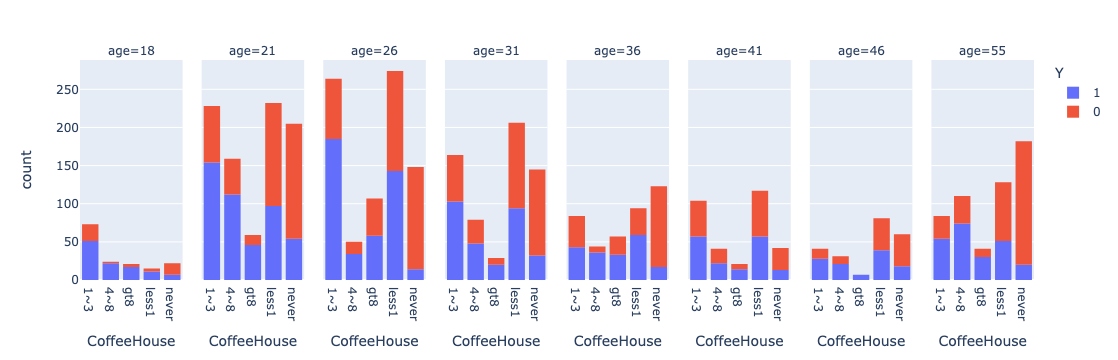

In [386]:
# Craete a Plotly chart to visualize the age, number of visits to Coffee House and acceptance rates
px.histogram(coffee_coupon_data.sort_values(['age'],ascending=True), x = 'CoffeeHouse', color='Y', facet_col='age')

In [387]:
# Footprint and Acceptance rates seems higher in age group 21-30

##### Static Image of the plotly chart for Github Page

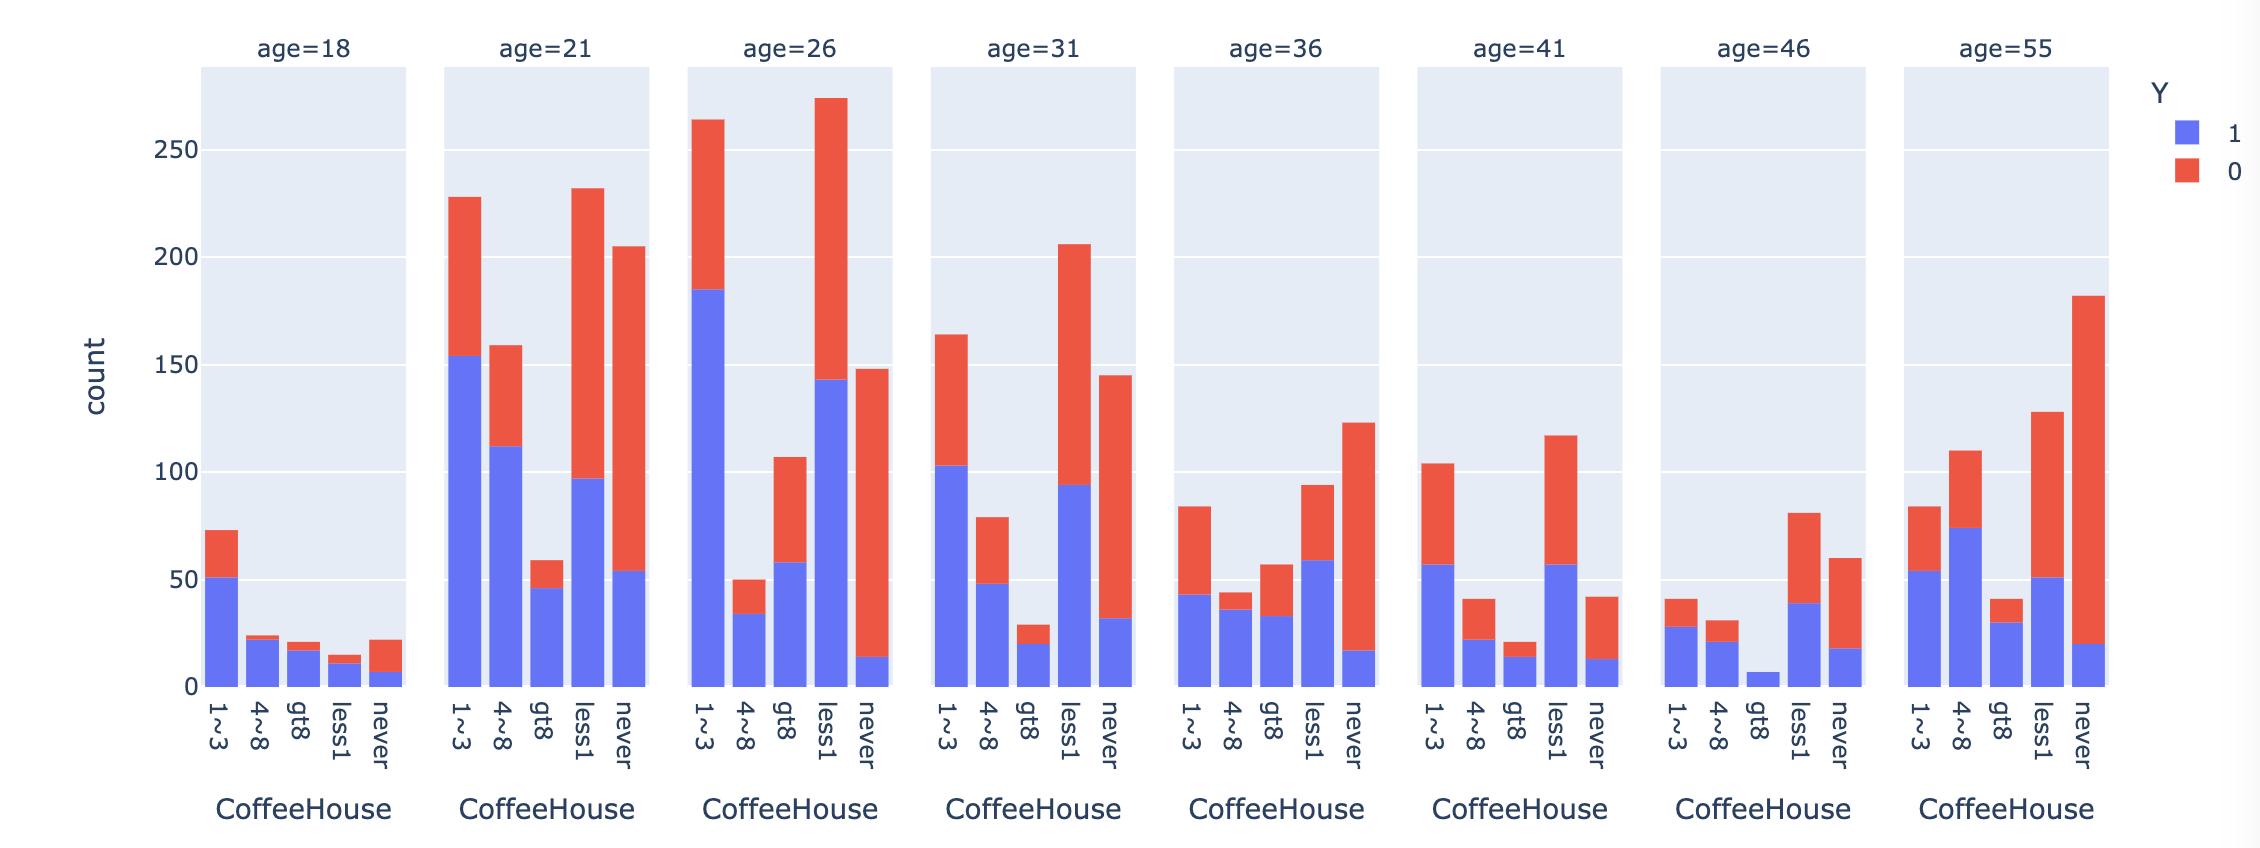

##### Analyzing Occupation & Coffee House variables

<Axes: xlabel='CoffeeHouse', ylabel='occupation'>

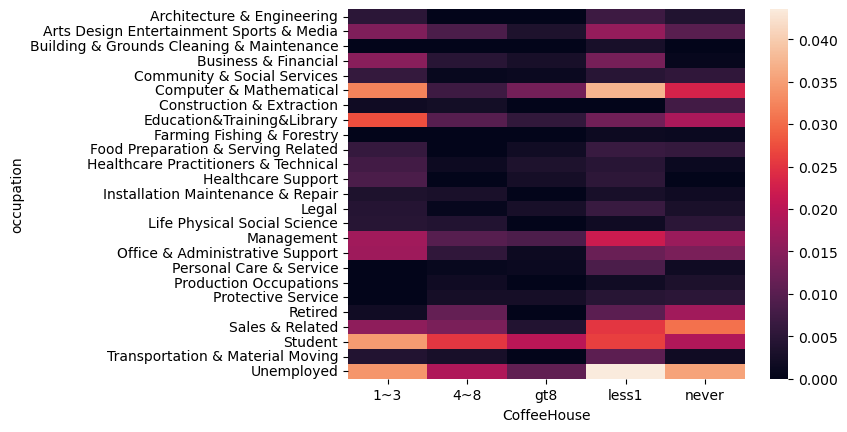

In [390]:
# create sns heatmap to co-relate occupation and CoffeeHouse visits
sns.heatmap(pd.crosstab(coffee_coupon_data.occupation, coffee_coupon_data.CoffeeHouse, normalize=True), annot=False)

In [391]:
# Occupations with max footprint in Coffee House
# Unemployed, Student, Computer & Mathematical, Education&Training$Library

<Axes: xlabel='count', ylabel='occupation'>

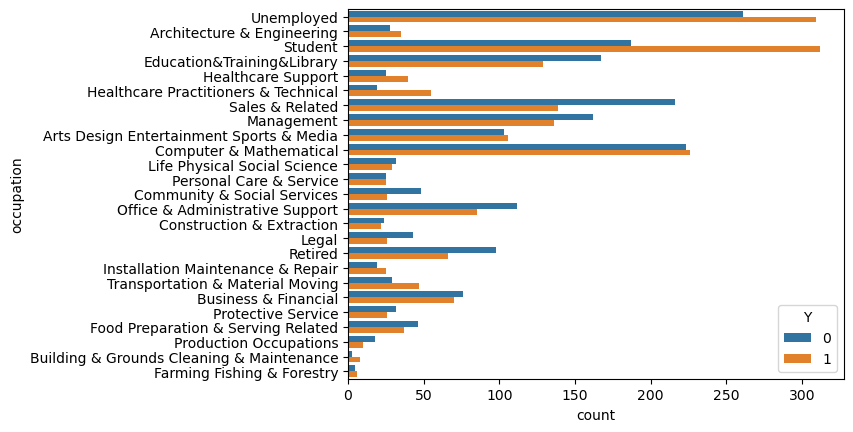

In [392]:
# create sns bar chart for occupation and acceptance rate
sns.countplot(data=coffee_coupon_data, y='occupation', hue='Y')

In [393]:
# Occupations with higher acceptance rates are: Unemployed, Student
# Comparitively lower for Computer & Mathematical, Education&Training$Library
# Healthcare support and Healthcare Practitioners & Technical group also have higher acceptance rates although population is less in number

##### Analyzing weather, Temperaturs, Time & Coffee House

<Axes: xlabel='CoffeeHouse', ylabel='weather'>

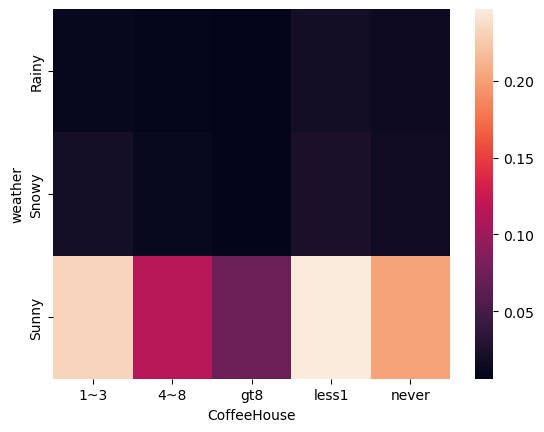

In [395]:
# create sns heatmap to co-relate weather and CoffeeHouse visits
sns.heatmap(pd.crosstab(coffee_coupon_data.weather, coffee_coupon_data.CoffeeHouse, normalize=True), annot=False)

In [396]:
# Sunny weather seems to bring more footprint into the Coffee House

<Axes: xlabel='weather', ylabel='count'>

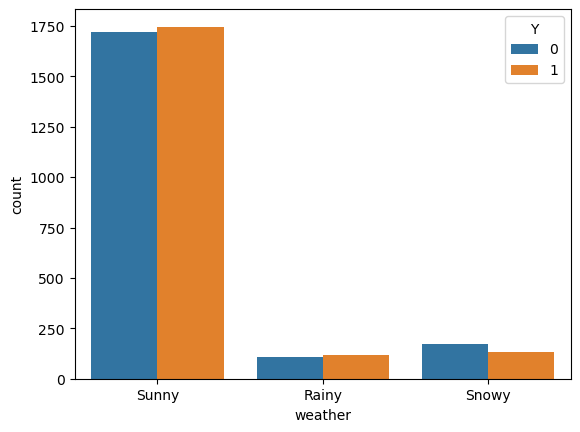

In [397]:
# create sns bar chart for weather and acceptance rate
sns.countplot(data=coffee_coupon_data, x='weather', hue='Y')

In [398]:
# weather doesn't seem to affect the acceptance rates but the footprint increases on a sunny day

<Axes: xlabel='CoffeeHouse', ylabel='temperature'>

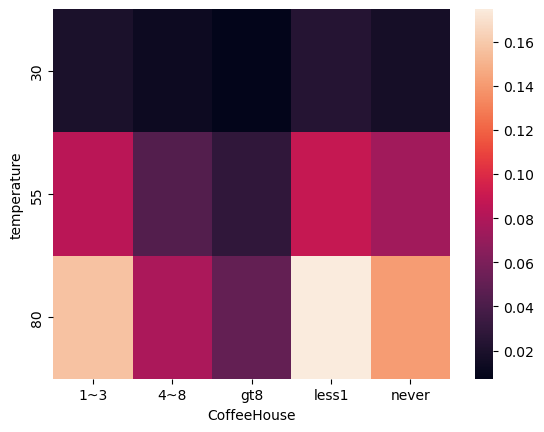

In [399]:
# create sns heatmap to co-relate temperature and CoffeeHouse visits
sns.heatmap(pd.crosstab(coffee_coupon_data.temperature, coffee_coupon_data.CoffeeHouse, normalize=True), annot=False)

In [400]:
# Footprint is higher at temperature more than 55, increases at higher temperature of 80 degrees 

<Axes: xlabel='temperature', ylabel='count'>

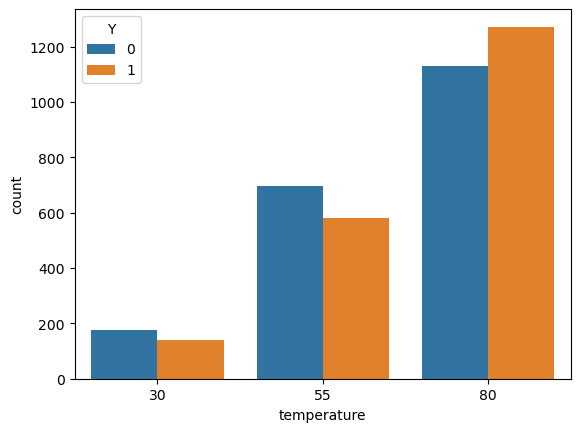

In [401]:
# create sns bar chart for temperature and acceptance rate
sns.countplot(data=coffee_coupon_data, x='temperature', hue='Y')

In [402]:
# Acceptance rates are higher at 80 degrees

<Axes: xlabel='CoffeeHouse', ylabel='time'>

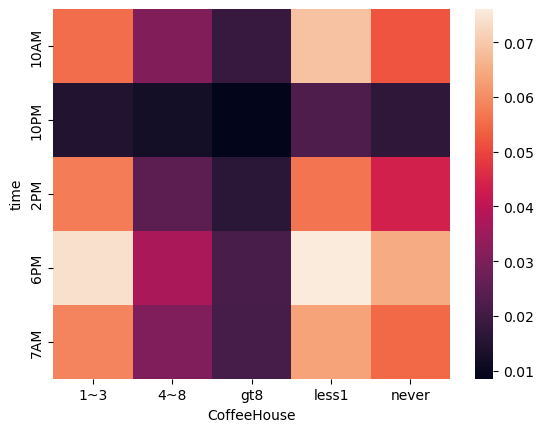

In [403]:
# create sns heatmap to co-relate time and CoffeeHouse visits
sns.heatmap(pd.crosstab(coffee_coupon_data.time, coffee_coupon_data.CoffeeHouse, normalize=True), annot=False)

In [404]:
# Footprint is highest at 6 pm for those visiting more than once. Also higher at 10 am, 2 pm, 7 am

<Axes: xlabel='time', ylabel='count'>

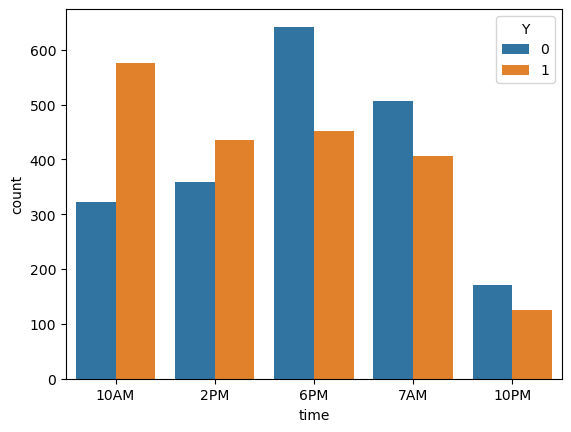

In [405]:
# create sns bar chart for time and acceptance rate
sns.countplot(data=coffee_coupon_data, x='time', hue='Y')

In [406]:
# Acceptance rates are higher at 10 am and 2 pm

##### Analyzing Marital status

<Axes: xlabel='CoffeeHouse', ylabel='maritalStatus'>

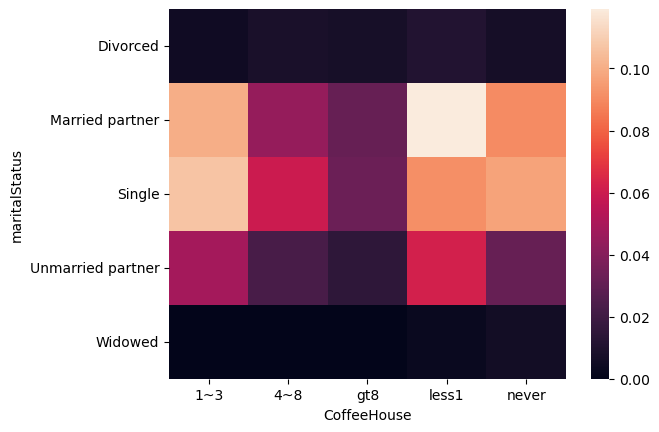

In [408]:
# create sns heatmap to co-relate maritalStatus and CoffeeHouse visits
sns.heatmap(pd.crosstab(coffee_coupon_data.maritalStatus, coffee_coupon_data.CoffeeHouse, normalize=True), annot=False)

In [409]:
# Footprint is higher for Single and Married Partner

<Axes: xlabel='count', ylabel='maritalStatus'>

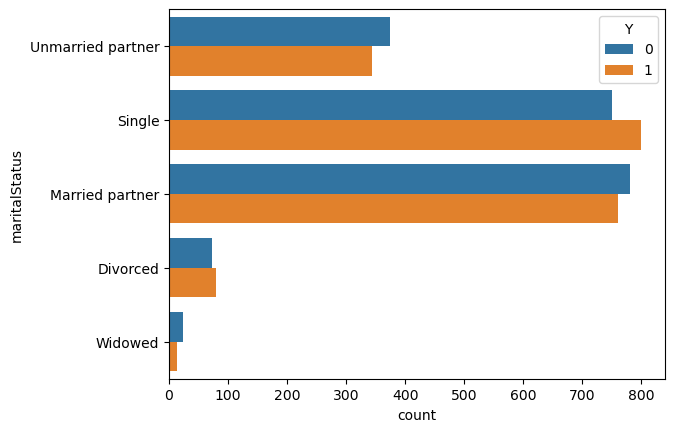

In [410]:
# create sns bar chart for maritalStatus and acceptance rate
sns.countplot(data=coffee_coupon_data, y='maritalStatus', hue='Y')

In [411]:
# Acceptance rates are higher for those who are single

##### Analyzing people with children

0   destination           3996 non-null   object
 1   passanger             3996 non-null   object
 2   weather               3996 non-null   object
 3   temperature           3996 non-null   int64 
 4   time                  3996 non-null   object
 5   coupon                3996 non-null   object
 6   expiration            3996 non-null   object
 7   gender                3996 non-null   object
 8   age                   3996 non-null   int64 
 9   maritalStatus         3996 non-null   object
 10  has_children          3996 non-null   int64 
 11  education             3996 non-null   object
 12  occupation            3996 non-null   object
 13  income                3996 non-null   int64 
 15  CoffeeHouse           3996 non-null   object
 19  toCoupon_GEQ5min      3996 non-null   int64 
 20  toCoupon_GEQ15min     3996 non-null   int64 
 21  toCoupon_GEQ25min     3996 non-null   int64 
 22  direction_same        3996 non-null   int64 
 23  direction_opp         3996 non-null   int64 

<Axes: xlabel='count', ylabel='has_children'>

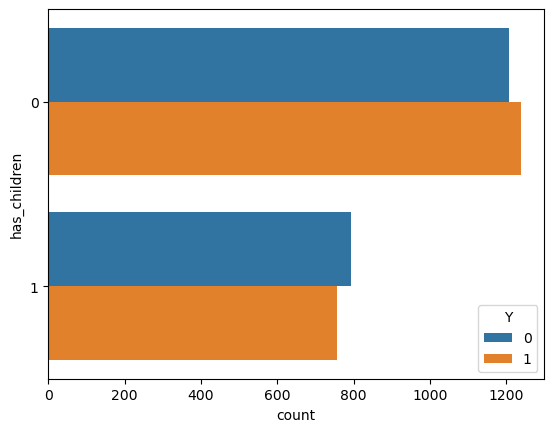

In [414]:
# create sns bar chart for has_children and acceptance rate
sns.countplot(data=coffee_coupon_data, y='has_children', hue='Y')

<Axes: xlabel='CoffeeHouse', ylabel='has_children'>

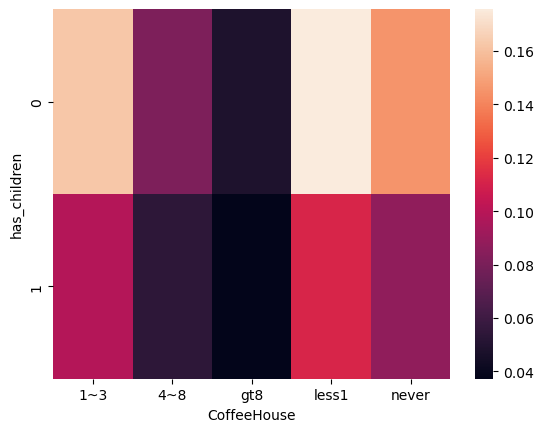

In [415]:
# create sns heatmap to co-relate has_children and CoffeeHouse visits
sns.heatmap(pd.crosstab(coffee_coupon_data.has_children, coffee_coupon_data.CoffeeHouse, normalize=True), annot=False)

##### Analyzing int variables

In [417]:
coffee_coupon_data['direction_same'].value_counts()

direction_same
0    3246
1     750
Name: count, dtype: int64

In [418]:
# Descriptive Statistics
coffee_coupon_data.select_dtypes(include='number').corr()

,temperature,age,has_children,income,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
temperature,1.000000,-0.019360,-0.040143,-0.022683,NaN,-0.159504,-0.065255,0.013079,-0.013079,0.071293
age,-0.019360,1.000000,0.418717,0.057345,NaN,0.041744,0.002236,-0.046047,0.046047,-0.075050
has_children,-0.040143,0.418717,1.000000,0.092676,NaN,0.099610,0.011048,-0.039349,0.039349,-0.017294
income,-0.022683,0.057345,0.092676,1.000000,NaN,0.030929,-0.005519,-0.035940,0.035940,-0.041175
toCoupon_GEQ5min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
toCoupon_GEQ15min,-0.159504,0.041744,0.099610,0.030929,NaN,1.000000,0.279314,-0.292558,0.292558,-0.094104
toCoupon_GEQ25min,-0.065255,0.002236,0.011048,-0.005519,NaN,0.279314,1.000000,-0.139399,0.139399,-0.089372
direction_same,0.013079,-0.046047,-0.039349,-0.035940,NaN,-0.292558,-0.139399,1.000000,-1.000000,0.030204
direction_opp,-0.013079,0.046047,0.039349,0.035940,NaN,0.292558,0.139399,-1.000000,1.000000,-0.030204
Y,0.071293,-0.075050,-0.017294,-0.041175,NaN,-0.094104,-0.089372,0.030204,-0.030204,1.000000


In [419]:
# NaN values in toCoupon_GEQ5min column represent all values = 1 in that column
# There are essentially 3 categories for this data: 5 to 15 min, 15 to 25 min and >25 min
# Add additional column distance to the dataset for these 3 categories for ease of analysis:
# 0: 5 to 15 min (toCoupon_GEQ15min == 0 and toCoupon_GEQ25min == 0)
# 1: 15 to 25 min (toCoupon_GEQ15min == 1 and toCoupon_GEQ25min == 0)
# 2: >25 min (toCoupon_GEQ15min == 0 and toCoupon_GEQ25min == 1)

In [420]:
# Define a function to assign values based on conditions
def assign_distance(row):
    if row['toCoupon_GEQ15min'] == 0 and row['toCoupon_GEQ25min'] == 0:
        return 0
    elif row['toCoupon_GEQ15min'] == 1 and row['toCoupon_GEQ25min'] == 0:
        return 1
    elif row['toCoupon_GEQ15min'] == 1 and row['toCoupon_GEQ25min'] == 1:
        return 2
    else:
        return np.nan

# Apply the function to create the new column
coffee_coupon_data.loc[:,'distance'] = coffee_coupon_data.apply(assign_distance, axis=1)

/var/folders/g1/93j3c49d113c4k5fv5g81_3m0000gn/T/ipykernel_47064/3378815380.py:13: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [421]:
# Convert the 'distance' column to int64
coffee_coupon_data.loc[:,'distance'] = coffee_coupon_data['distance'].astype('int64')
coffee_coupon_data['distance'].value_counts()

distance
0    1923
1    1763
2     310
Name: count, dtype: int64

<Axes: xlabel='CoffeeHouse', ylabel='distance'>

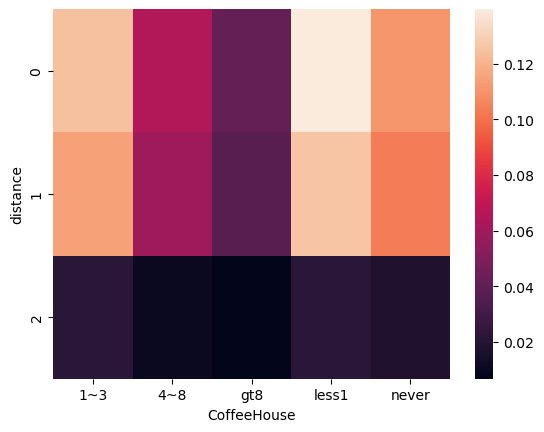

In [422]:
# create sns heatmap to co-relate distance and CoffeeHouse visits
sns.heatmap(pd.crosstab(coffee_coupon_data.distance, coffee_coupon_data.CoffeeHouse, normalize=True), annot=False)

In [423]:
# Acceptance rate is reducing as the distance increases 

<Axes: xlabel='count', ylabel='distance'>

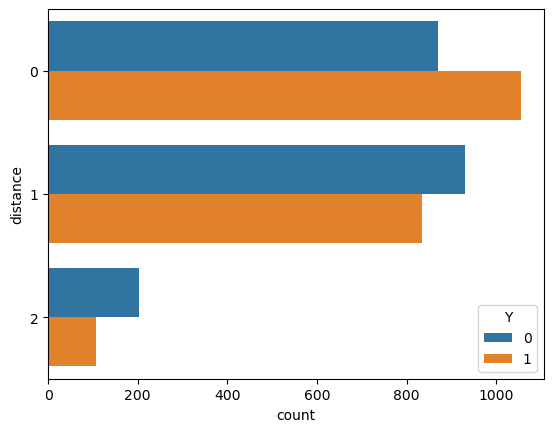

In [424]:
# create sns bar chart for distance and acceptance rate
sns.countplot(data=coffee_coupon_data, y='distance', hue='Y')

In [425]:
# Acceptance rate is reducing as the distance increases, is higher for distances between 5-15 min

##### Analyzing direction

In [427]:
coffee_coupon_data['direction_same'].value_counts()

direction_same
0    3246
1     750
Name: count, dtype: int64

<Axes: xlabel='CoffeeHouse', ylabel='direction_same'>

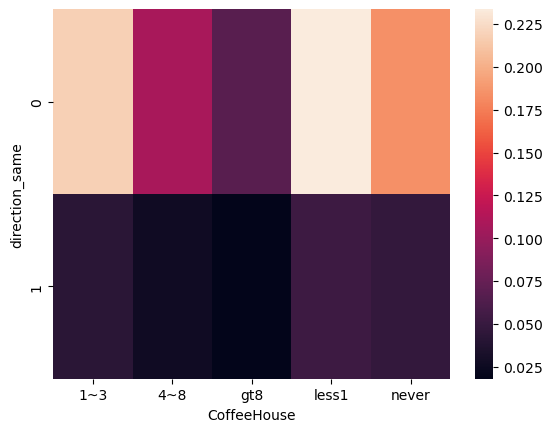

In [428]:
# create sns heatmap to co-relate direction_same and CoffeeHouse visits
sns.heatmap(pd.crosstab(coffee_coupon_data.direction_same, coffee_coupon_data.CoffeeHouse, normalize=True), annot=False)

In [429]:
# coupons were provided more frequently in the opposite direction

<Axes: xlabel='count', ylabel='direction_same'>

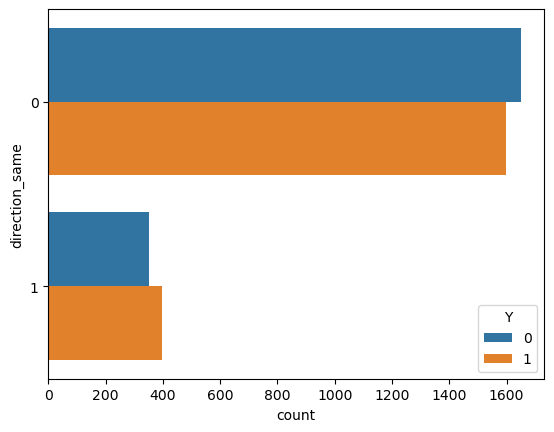

In [430]:
# create sns bar chart for direction_same and acceptance rate
sns.countplot(data=coffee_coupon_data, y='direction_same', hue='Y')

In [431]:
# coupons were provided more frequently in the opposite direction but acceptance rates are higher in the same direction

##### Analyzing Education

In [433]:
coffee_coupon_data['education'].value_counts()

education
Some college - no degree                  1371
Bachelors degree                          1370
Graduate degree (Masters or Doctorate)     598
Associates degree                          350
High School Graduate                       279
Some High School                            28
Name: count, dtype: int64

<Axes: xlabel='count', ylabel='education'>

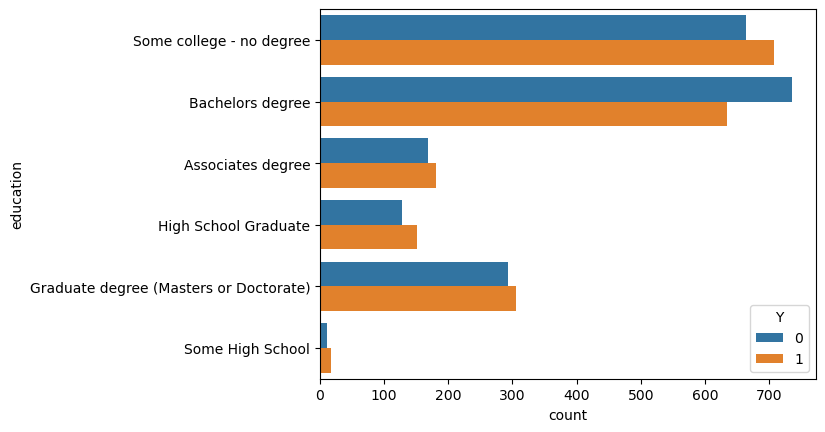

In [434]:
# create sns bar chart for education and acceptance rate
sns.countplot(data=coffee_coupon_data, y='education', hue='Y')

In [435]:
# Acceptance rates are higher for education other than Bachelors degree

<Axes: xlabel='CoffeeHouse', ylabel='education'>

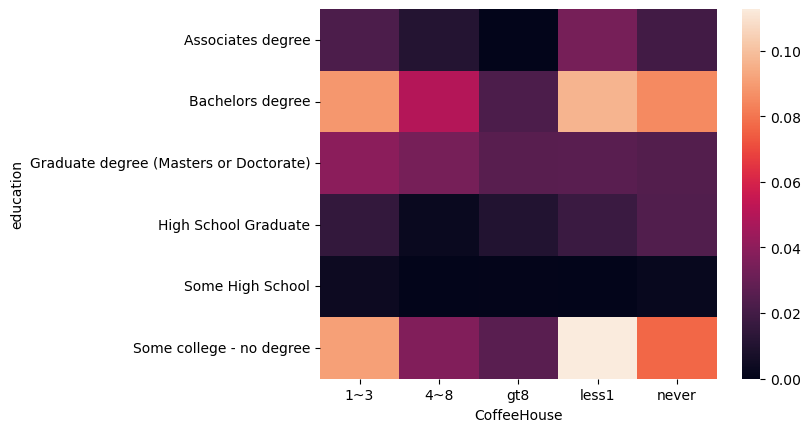

In [436]:
# create sns heatmap for education and CoffeeHouse visits
sns.heatmap(pd.crosstab(coffee_coupon_data.education, coffee_coupon_data.CoffeeHouse, normalize=True), annot=False)

In [437]:
# 'some college-no degree' and Bachelors degree go to Coffee House 1~3 times
# High school students do not go to Coffee House

##### Analyzing gender

In [439]:
coffee_coupon_data['gender'].value_counts() 

gender
Female    2051
Male      1945
Name: count, dtype: int64

<Axes: xlabel='CoffeeHouse', ylabel='gender'>

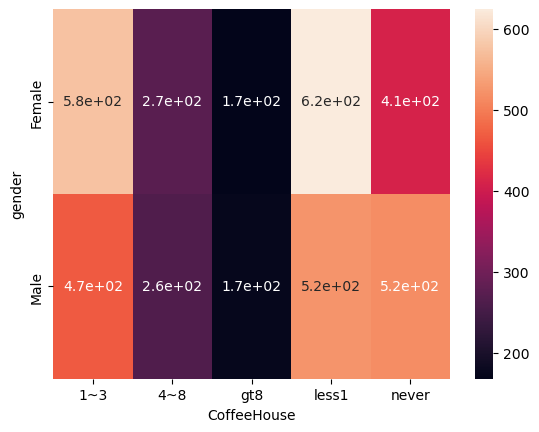

In [440]:
# create sns heatmap for gender and CoffeeHouse visits
sns.heatmap(pd.crosstab(coffee_coupon_data.gender, coffee_coupon_data.CoffeeHouse, normalize=False), annot=True)

In [441]:
# More females tend to visit 1~3 times than men

<Axes: xlabel='count', ylabel='gender'>

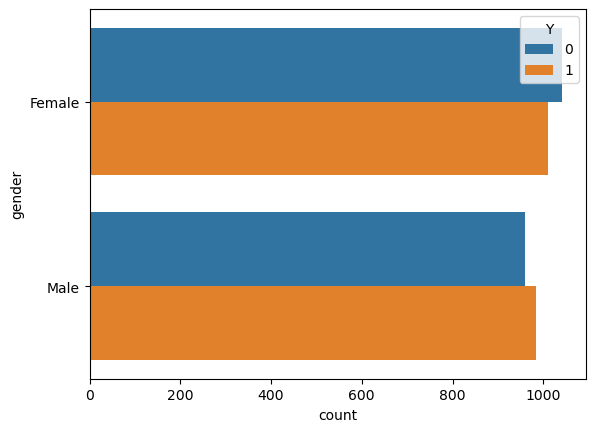

In [442]:
# create sns bar chart for gender and acceptance rate
sns.countplot(data=coffee_coupon_data, y='gender', hue='Y')

In [443]:
# Acceptance rates are slightly higher in Male

##### Analyzing destination

<Axes: xlabel='CoffeeHouse', ylabel='destination'>

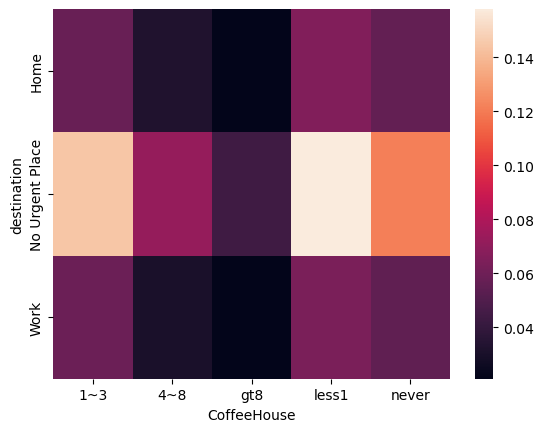

In [445]:
# create sns heatmap for destination and CoffeeHouse visits
sns.heatmap(pd.crosstab(coffee_coupon_data.destination, coffee_coupon_data.CoffeeHouse, normalize=True), annot=False)

<Axes: xlabel='count', ylabel='destination'>

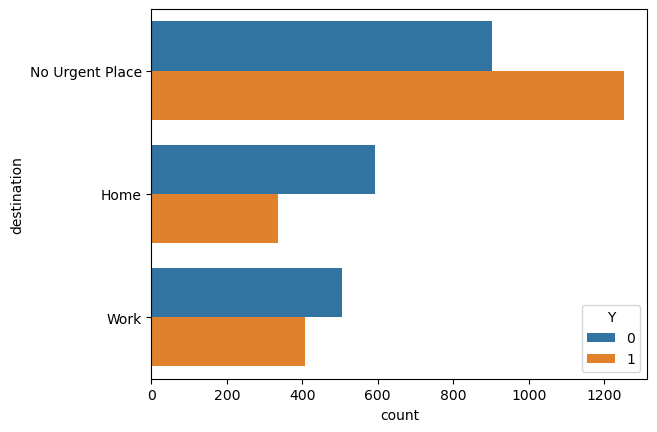

In [446]:
# create sns bar chart for destination and acceptance rate
sns.countplot(data=coffee_coupon_data, y='destination', hue='Y')

In [447]:
# People who have no urgent destination tend to visit 1~3 times and acceptance rates are very high in this case

##### Analyzing passanger

<Axes: xlabel='CoffeeHouse', ylabel='passanger'>

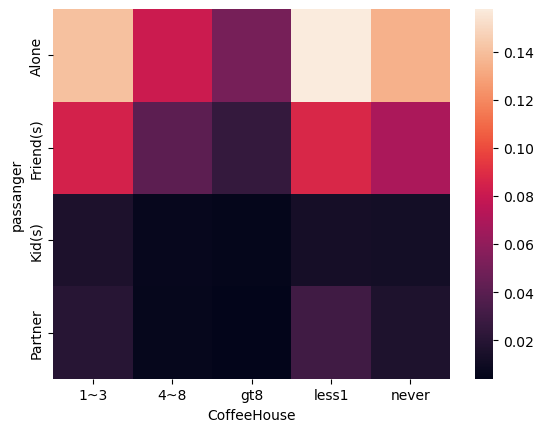

In [449]:
# create sns heatmap for passanger and CoffeeHouse visits
sns.heatmap(pd.crosstab(coffee_coupon_data.passanger, coffee_coupon_data.CoffeeHouse, normalize=True), annot=False)

<Axes: xlabel='count', ylabel='passanger'>

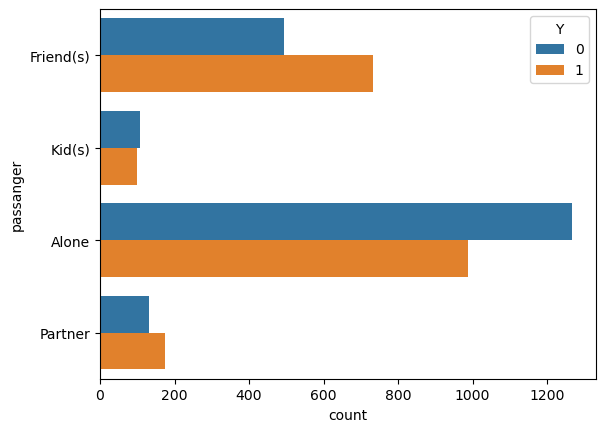

In [450]:
# create sns bar chart for passanger and acceptance rate
sns.countplot(data=coffee_coupon_data, y='passanger', hue='Y')

In [451]:
# People who travel alone are more frequently visiting 1~3 times but acceptance rate is comparatively low
# People traveling with Friends have higher acceptance rates and frequently go to Coffee House more than once 

##### Analyzing coupon expiration

<Axes: xlabel='CoffeeHouse', ylabel='expiration'>

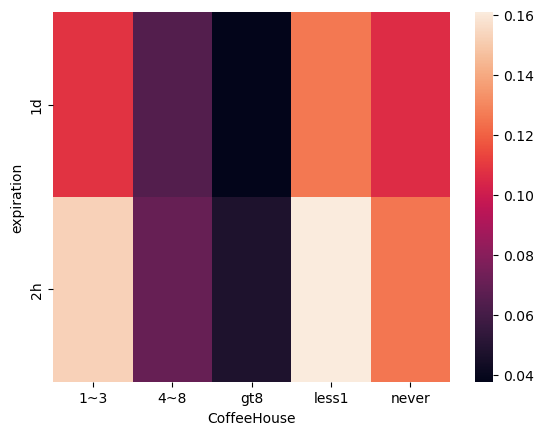

In [453]:
# create sns heatmap for expiration and CoffeeHouse visits
sns.heatmap(pd.crosstab(coffee_coupon_data.expiration, coffee_coupon_data.CoffeeHouse, normalize=True), annot=False)

<Axes: xlabel='count', ylabel='expiration'>

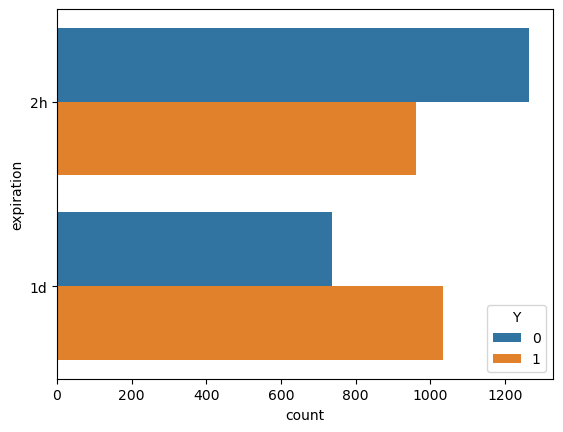

In [454]:
# create sns bar chart for expiration and acceptance rate
sns.countplot(data=coffee_coupon_data, y='expiration', hue='Y')

In [455]:
# Coupons with validity 1d have much higher acceptance rates and fairly well footprint more than once. 
# Although footprint is more for 2h valid coupon

##### Analyzing income

<Axes: xlabel='CoffeeHouse', ylabel='income'>

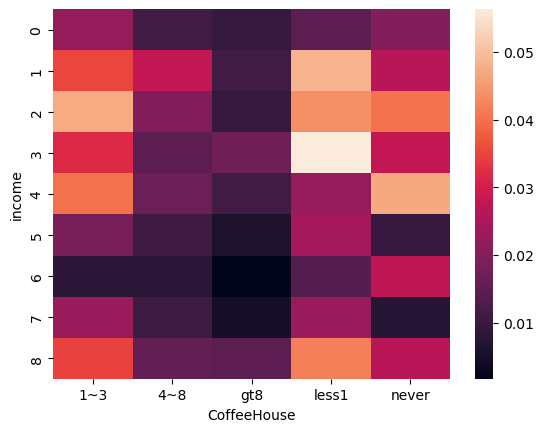

In [457]:
# create sns heatmap for income and CoffeeHouse visits
sns.heatmap(pd.crosstab(coffee_coupon_data.income, coffee_coupon_data.CoffeeHouse, normalize=True), annot=False)

<Axes: xlabel='count', ylabel='income'>

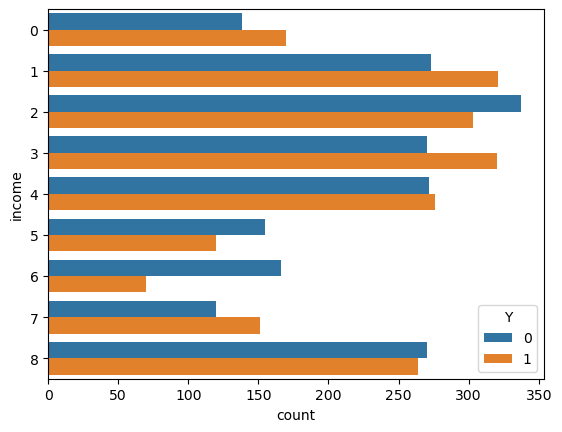

In [458]:
# create sns bar chart for income and acceptance rate
sns.countplot(data=coffee_coupon_data, y='income', hue='Y')

In [459]:
# Customers having income up until Group 4 visit 1~3 times more frequently and have higher acceptance rates (income less than $62499)

##### Based on above observations, we could analyze following scenarios

In [461]:
# Possible scenarios for higher footprint & Acceptance rates: 
    # expiration: 1d valid coupon vs 2h
    # passanger: Travelling with Friends vs alone
    # gender: Female vs Male
    # education: some college-no degree vs Bachelors degree
    # maritalStatus: Single and Married Partner and all others
    # occupation: Unemployed or Student vs others
    # age: 21-30 vs others
    # income: less than $62K vs others

# CoffeeHouse Subsets for analyzing acceptance rates:
    # subset1: drivers who went more than once, travelling with friends, single, unemployed or student, age 21-30
    # subset2: drivers who went more than once, travelling alone, single, some college - no degree, age 21-30
    # subset3: drivers who went more than once, income less than $62K, coupon expiration 1d
    # subset4: Female drivers travelling with friends 
    # subset5: Male drivers travelling with friends


In [462]:
# Create a list of all values for those who visit Coffe House more than once
coffee_more_than_once = ['1~3', '4~8', 'gt8']

In [463]:
# subset1: drivers who went more than once, travelling with friends, single, unemployed or student, age 21-30
coffee_subset1 = coffee_coupon_data.query('(CoffeeHouse in @coffee_more_than_once) and (passanger == "Friend(s)") and (maritalStatus == "Single") and (age >= 21 and age <= 30)')
coffee_subset1

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y,distance
155,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Male,26,Single,...,gt8,gt8,gt8,1,0,0,0,1,0,0
158,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Male,26,Single,...,gt8,gt8,gt8,1,0,0,0,1,1,0
159,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Male,26,Single,...,gt8,gt8,gt8,1,1,0,0,1,0,1
160,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Male,26,Single,...,gt8,gt8,gt8,1,1,0,0,1,1,1
162,No Urgent Place,Friend(s),Sunny,80,6PM,Coffee House,2h,Male,26,Single,...,gt8,gt8,gt8,1,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9924,No Urgent Place,Friend(s),Sunny,80,10PM,Coffee House,1d,Female,21,Single,...,gt8,gt8,4~8,1,1,0,0,1,1,1
10012,No Urgent Place,Friend(s),Sunny,80,10PM,Coffee House,1d,Male,26,Single,...,1~3,4~8,1~3,1,1,0,0,1,0,1
10340,No Urgent Place,Friend(s),Sunny,80,10PM,Coffee House,1d,Male,21,Single,...,less1,never,never,1,1,0,0,1,1,1
10427,No Urgent Place,Friend(s),Sunny,80,10PM,Coffee House,1d,Female,21,Single,...,gt8,gt8,4~8,1,1,0,0,1,1,1


In [464]:
# Acceptance rates
coffee_acceptance_rate_subset1 = coffee_subset1[coffee_subset1["Y"] == 1].shape[0] / coffee_subset1["Y"].shape[0] *100
coffee_acceptance_rate_subset1

78.07486631016043

In [465]:
# subset2: drivers who went more than once, travelling alone, single, some college - no degree, age 21-30
coffee_subset2 = coffee_coupon_data.query('(CoffeeHouse in @coffee_more_than_once) and (passanger == "Alone") and (maritalStatus == "Single") and (age >= 21 and age <= 30)')
coffee_subset2

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y,distance
166,No Urgent Place,Alone,Sunny,55,10AM,Coffee House,2h,Male,26,Single,...,gt8,gt8,gt8,1,0,0,0,1,0,0
169,Home,Alone,Sunny,80,6PM,Coffee House,2h,Male,26,Single,...,gt8,gt8,gt8,1,0,0,0,1,0,0
170,Work,Alone,Sunny,55,7AM,Coffee House,2h,Male,26,Single,...,gt8,gt8,gt8,1,1,1,0,1,0,2
175,Work,Alone,Sunny,55,7AM,Coffee House,2h,Male,26,Single,...,gt8,gt8,gt8,1,1,0,0,1,0,1
188,Home,Alone,Sunny,80,6PM,Coffee House,2h,Female,26,Single,...,4~8,1~3,less1,1,0,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12185,Home,Alone,Snowy,30,10PM,Coffee House,2h,Male,26,Single,...,gt8,gt8,gt8,1,1,0,0,1,0,1
12191,Work,Alone,Snowy,30,7AM,Coffee House,1d,Male,26,Single,...,gt8,gt8,gt8,1,0,0,1,0,1,0
12272,Home,Alone,Rainy,55,10PM,Coffee House,2h,Male,26,Single,...,4~8,4~8,4~8,1,0,0,1,0,0,0
12273,Home,Alone,Snowy,30,10PM,Coffee House,2h,Male,26,Single,...,4~8,4~8,4~8,1,1,0,0,1,0,1


In [466]:
# Acceptance rates
coffee_acceptance_rate_subset2 = coffee_subset2[coffee_subset2["Y"] == 1].shape[0] / coffee_subset2["Y"].shape[0] *100
coffee_acceptance_rate_subset2

59.48905109489051

In [467]:
# subset3: drivers who went more than once, income less than $62K, coupon expiration 2h
coffee_subset3 = coffee_coupon_data.query('(CoffeeHouse in @coffee_more_than_once) and (income <= 4) and (expiration == "1d")')
coffee_subset3

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y,distance
48,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Male,46,Single,...,1~3,1~3,never,1,0,0,0,1,1,0
50,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Male,46,Single,...,1~3,1~3,never,1,1,0,0,1,0,1
114,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Male,26,Unmarried partner,...,4~8,1~3,less1,1,0,0,0,1,1,0
116,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Male,26,Unmarried partner,...,4~8,1~3,less1,1,1,0,0,1,1,1
158,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Male,26,Single,...,gt8,gt8,gt8,1,0,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12214,Work,Alone,Snowy,30,7AM,Coffee House,1d,Female,26,Unmarried partner,...,1~3,1~3,1~3,1,0,0,1,0,1,0
12236,Work,Alone,Snowy,30,7AM,Coffee House,1d,Female,21,Married partner,...,1~3,1~3,less1,1,0,0,1,0,1,0
12279,Work,Alone,Snowy,30,7AM,Coffee House,1d,Male,26,Single,...,4~8,4~8,4~8,1,0,0,1,0,1,0
12366,Work,Alone,Snowy,30,7AM,Coffee House,1d,Female,31,Single,...,less1,4~8,1~3,1,0,0,1,0,1,0


In [468]:
# Acceptance rates
coffee_acceptance_rate_subset3 = coffee_subset3[coffee_subset3["Y"] == 1].shape[0] / coffee_subset3["Y"].shape[0] *100
coffee_acceptance_rate_subset3

80.39927404718694

In [469]:
# subset4: Female drivers who went more than once, travelling with friends 
coffee_subset4 = coffee_coupon_data.query('(CoffeeHouse in @coffee_more_than_once) and (gender == "Female") and (passanger == "Friend(s)")')
coffee_subset4

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y,distance
177,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,26,Single,...,4~8,1~3,less1,1,0,0,0,1,1,0
180,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,26,Single,...,4~8,1~3,less1,1,0,0,0,1,1,0
181,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,26,Single,...,4~8,1~3,less1,1,1,0,0,1,1,1
182,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,26,Single,...,4~8,1~3,less1,1,1,0,0,1,1,1
184,No Urgent Place,Friend(s),Sunny,80,6PM,Coffee House,2h,Female,26,Single,...,4~8,1~3,less1,1,0,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10448,No Urgent Place,Friend(s),Sunny,80,10PM,Coffee House,1d,Female,36,Divorced,...,4~8,4~8,less1,1,1,0,0,1,1,1
10509,No Urgent Place,Friend(s),Sunny,80,10PM,Coffee House,1d,Female,55,Married partner,...,1~3,4~8,1~3,1,1,0,0,1,1,1
10570,No Urgent Place,Friend(s),Sunny,80,10PM,Coffee House,1d,Female,31,Married partner,...,4~8,gt8,1~3,1,1,0,0,1,1,1
10741,No Urgent Place,Friend(s),Sunny,80,10PM,Coffee House,1d,Female,41,Married partner,...,4~8,4~8,4~8,1,1,0,0,1,1,1


In [470]:
# Acceptance rates
coffee_acceptance_rate_subset4 = coffee_subset4[coffee_subset4["Y"] == 1].shape[0] / coffee_subset4["Y"].shape[0] *100
coffee_acceptance_rate_subset4

80.38585209003215

In [471]:
# subset5: Male drivers travelling with friends
coffee_subset5 = coffee_coupon_data.query('(CoffeeHouse in @coffee_more_than_once) and (gender == "Male") and (passanger == "Friend(s)")')
coffee_subset5

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y,distance
45,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Male,46,Single,...,1~3,1~3,never,1,0,0,0,1,1,0
48,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Male,46,Single,...,1~3,1~3,never,1,0,0,0,1,1,0
49,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Male,46,Single,...,1~3,1~3,never,1,1,0,0,1,1,1
50,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Male,46,Single,...,1~3,1~3,never,1,1,0,0,1,0,1
52,No Urgent Place,Friend(s),Sunny,80,6PM,Coffee House,2h,Male,46,Single,...,1~3,1~3,never,1,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10033,No Urgent Place,Friend(s),Sunny,80,10PM,Coffee House,1d,Male,26,Married partner,...,4~8,gt8,1~3,1,1,0,0,1,0,1
10340,No Urgent Place,Friend(s),Sunny,80,10PM,Coffee House,1d,Male,21,Single,...,less1,never,never,1,1,0,0,1,1,1
10488,No Urgent Place,Friend(s),Sunny,80,10PM,Coffee House,1d,Male,18,Single,...,1~3,less1,less1,1,1,0,0,1,1,1
10549,No Urgent Place,Friend(s),Sunny,80,10PM,Coffee House,1d,Male,26,Single,...,1~3,4~8,4~8,1,1,0,0,1,1,1


In [472]:
# Acceptance rates
coffee_acceptance_rate_subset5 = coffee_subset5[coffee_subset5["Y"] == 1].shape[0] / coffee_subset5["Y"].shape[0] *100
coffee_acceptance_rate_subset5

72.01365187713311

In [473]:
# Create DataFrame to store acceptance rates from all coffee subsets and respective labels
coffee_acceptance_rates = [coffee_acceptance_rate_subset1, coffee_acceptance_rate_subset2, coffee_acceptance_rate_subset3, coffee_acceptance_rate_subset4, coffee_acceptance_rate_subset5]
coffee_subset_labels = ['Subset 1', 'Subset 2', 'Subset 3', 'Subset 4', 'Subset 5']
coffee_acceptance_rates

[78.07486631016043,
 59.48905109489051,
 80.39927404718694,
 80.38585209003215,
 72.01365187713311]

In [474]:
# create a df for acceptance rates for all subsets (Key: Subset1, Subset2, etc.)
coffee_acceptance_rates_df = pd.DataFrame({'Coffee Subset': coffee_subset_labels, 'Acceptance Rate': coffee_acceptance_rates})
coffee_acceptance_rates_df

,Coffee Subset,Acceptance Rate
0,Subset 1,78.074866
1,Subset 2,59.489051
2,Subset 3,80.399274
3,Subset 4,80.385852
4,Subset 5,72.013652


([0, 1, 2, 3, 4],
 [Text(0, 0, 'Subset 3'),
  Text(1, 0, 'Subset 4'),
  Text(2, 0, 'Subset 1'),
  Text(3, 0, 'Subset 5'),
  Text(4, 0, 'Subset 2')])

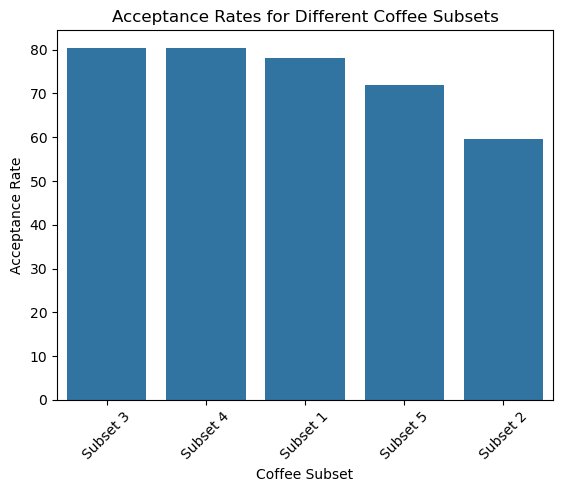

In [475]:
# create a bar plot of all the subsets
sns.barplot(data=coffee_acceptance_rates_df.sort_values('Acceptance Rate', ascending=False), x = 'Coffee Subset', y = 'Acceptance Rate')
plt.title('Acceptance Rates for Different Coffee Subsets')
plt.xticks(rotation=45)

In [476]:
# CoffeeHouse Subsets for analyzing acceptance rates:
    # subset1: drivers who went more than once, travelling with friends, single, unemployed or student, age 21-30
    # subset2: drivers who went more than once, travelling alone, single, some college - no degree, age 21-30
    # subset3: drivers who went more than once, income less than $62K, coupon expiration 1d
    # subset4: Female drivers travelling with friends 
    # subset5: Male drivers travelling with friends

In [477]:
# Conclusion CoffeeHouse:
    # from single variable analysis with Coffee House visits, acceptance rates are higher for:
        # people visiting Coffee House more than once
        # age group 21-30
        # Occupations: Unemployed, Student
        # Footprint is higher for Single and Married Partner
        # Acceptance rates are higher for those who are single
        # Frequency is higher for 'some college-no degree' and Bachelors degree
        # Acceptance rates are higher for education other than Bachelors degree
        # More females tend to visit 1~3 times than men
        # Acceptance rates are slightly higher in Male
        # People traveling with Friends
        # Customers having income up until Group 4 (income less than $62499)
        # time at 10 am and 2 pm
        # temepratures at 80 degrees
        # weather doesn't seem to affect the acceptance rates but the footprint increases on a sunny day
        # Acceptance rate is reducing as the distance increases, is higher for distances between 5-15 min
        # coupons were provided more frequently in the opposite direction but acceptance rates are higher in the same direction
        # People who have no urgent destination tend to visit 1~3 times and acceptance rates are very high in this case
        # People who travel alone are more frequently visiting 1~3 times but acceptance rate is comparatively low
        # Coupons with validity 1d have much higher acceptance rates and fairly well footprint more than once. 
        # Although footprint is more for 2h valid coupon

    # from Subsets and multiple variable analysis, acceptance rates are higher: 
        # For drivers who went more than once, 
        # Female travelling with friends, 
        # single, unemployed or student, age 21-30
        # income less than $62K, coupon expiration 1d